Question 1
Visualizing Pairwise Fisher Discriminant
- Dataset: https://www.kaggle.com/c/digit-recognizer
- For every pair of classes (0, 1), (0, 9), ..., (8, 9)
- Compute the Fisher Discriminant of each pixel (feature)
o Note that some of the pixels might have a zero denominator
o Treat that as 0 Fisher
- Normalize the remaining Fisher discriminant values from 0 to 1
- Draw the Fisher images of each of the pairs of classes
- See how they make sense (e.g. Class (0, 1), (3, 5), (4, 6)).
- This is “feature wise” Fisher goodness of each dimension

In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from scipy.linalg import eigh
import seaborn as sns

In [7]:
# Load the dataset
data = pd.read_csv('train.csv')
print(data.head())

   label  pixel0  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  \
0      1       0       0       0       0       0       0       0       0   
1      0       0       0       0       0       0       0       0       0   
2      1       0       0       0       0       0       0       0       0   
3      4       0       0       0       0       0       0       0       0   
4      0       0       0       0       0       0       0       0       0   

   pixel8  ...  pixel774  pixel775  pixel776  pixel777  pixel778  pixel779  \
0       0  ...         0         0         0         0         0         0   
1       0  ...         0         0         0         0         0         0   
2       0  ...         0         0         0         0         0         0   
3       0  ...         0         0         0         0         0         0   
4       0  ...         0         0         0         0         0         0   

   pixel780  pixel781  pixel782  pixel783  
0         0         0         

In [9]:
# Data Summary
print(data.info())
print(data.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42000 entries, 0 to 41999
Columns: 785 entries, label to pixel783
dtypes: int64(785)
memory usage: 251.5 MB
None
              label   pixel0   pixel1   pixel2   pixel3   pixel4   pixel5  \
count  42000.000000  42000.0  42000.0  42000.0  42000.0  42000.0  42000.0   
mean       4.456643      0.0      0.0      0.0      0.0      0.0      0.0   
std        2.887730      0.0      0.0      0.0      0.0      0.0      0.0   
min        0.000000      0.0      0.0      0.0      0.0      0.0      0.0   
25%        2.000000      0.0      0.0      0.0      0.0      0.0      0.0   
50%        4.000000      0.0      0.0      0.0      0.0      0.0      0.0   
75%        7.000000      0.0      0.0      0.0      0.0      0.0      0.0   
max        9.000000      0.0      0.0      0.0      0.0      0.0      0.0   

        pixel6   pixel7   pixel8  ...      pixel774      pixel775  \
count  42000.0  42000.0  42000.0  ...  42000.000000  42000.000000   
mean 

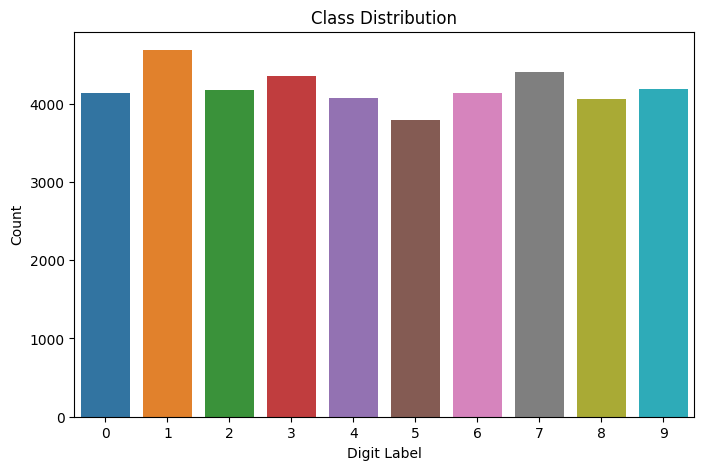

In [22]:
# Class Distribution
plt.figure(figsize=(8, 5))
sns.countplot(x='label', data=data)
plt.title('Class Distribution')
plt.xlabel('Digit Label')
plt.ylabel('Count')
plt.show()

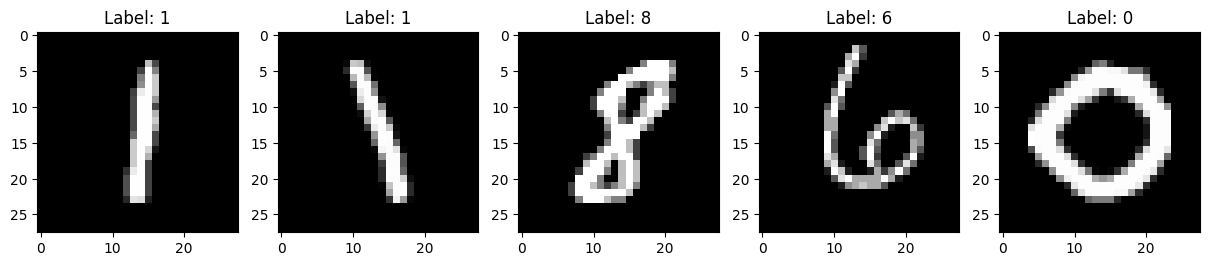

In [14]:
# Display some random digit images along with their labels
def plot_digits(images, labels, num_samples=5):
    fig, axes = plt.subplots(1, num_samples, figsize=(15, 3))
    for i in range(num_samples):
        idx = np.random.randint(len(images))
        axes[i].imshow(images[idx].reshape(28, 28), cmap='gray')
        axes[i].set_title(f'Label: {labels[idx]}')
    plt.show()

plot_digits(data.drop('label', axis=1).values, data['label'].values)


In [16]:
# Missing Values (No missing values in this dataset, but you can check if needed)
print(data.isnull().sum())

label       0
pixel0      0
pixel1      0
pixel2      0
pixel3      0
           ..
pixel779    0
pixel780    0
pixel781    0
pixel782    0
pixel783    0
Length: 785, dtype: int64


In [17]:
# Data Integrity (Check for duplicates)
print(data.duplicated().sum())

0


In [23]:
# Separate features and labels
features = data.iloc[:, 1:].values
labels = data.iloc[:, 0].values
print(features)
print(labels)

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
[1 0 1 ... 7 6 9]


In [24]:
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)
print(scaled_features)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [44]:
# Define the pairs of classes
class_pairs = [(i, j) for i in range(9) for j in range(i + 1, 10)]
print(class_pairs)

[(0, 1), (0, 2), (0, 3), (0, 4), (0, 5), (0, 6), (0, 7), (0, 8), (0, 9), (1, 2), (1, 3), (1, 4), (1, 5), (1, 6), (1, 7), (1, 8), (1, 9), (2, 3), (2, 4), (2, 5), (2, 6), (2, 7), (2, 8), (2, 9), (3, 4), (3, 5), (3, 6), (3, 7), (3, 8), (3, 9), (4, 5), (4, 6), (4, 7), (4, 8), (4, 9), (5, 6), (5, 7), (5, 8), (5, 9), (6, 7), (6, 8), (6, 9), (7, 8), (7, 9), (8, 9)]


In [45]:
# Create a color map for different class pairs
colors = ['blue', 'red', 'green', 'purple', 'orange', 'yellow', 'cyan', 'magenta', 'lime', 'pink']

In [46]:
# Define an epsilon value to avoid division by zero
epsilon = 1e-8

In [47]:
# Create an empty DataFrame to store the Fisher features and labels for all class pairs
fisher_values_all = pd.DataFrame()

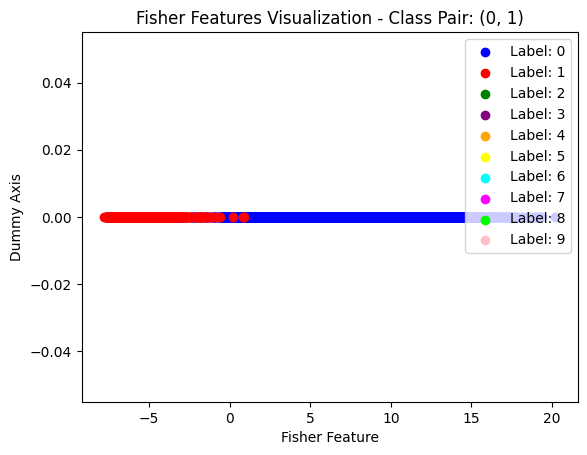

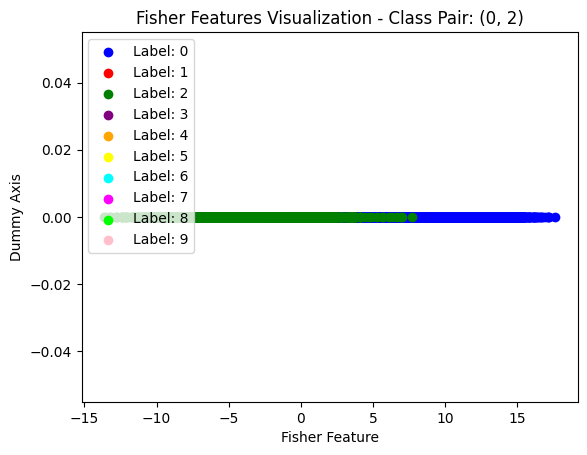

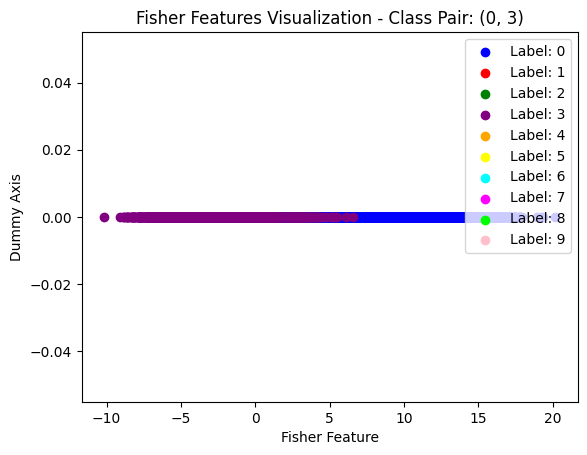

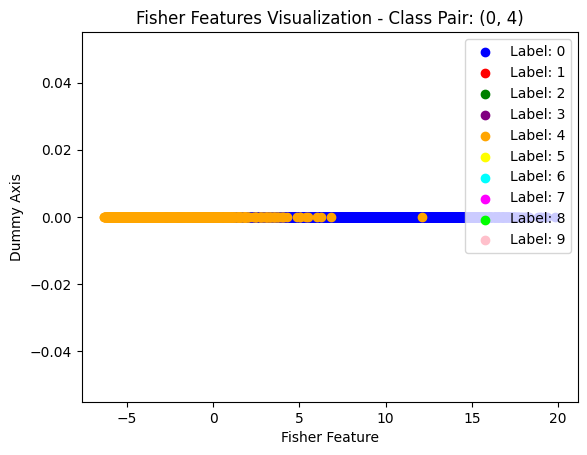

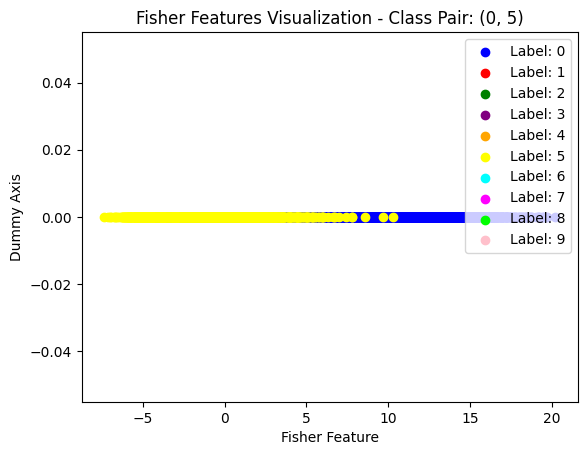

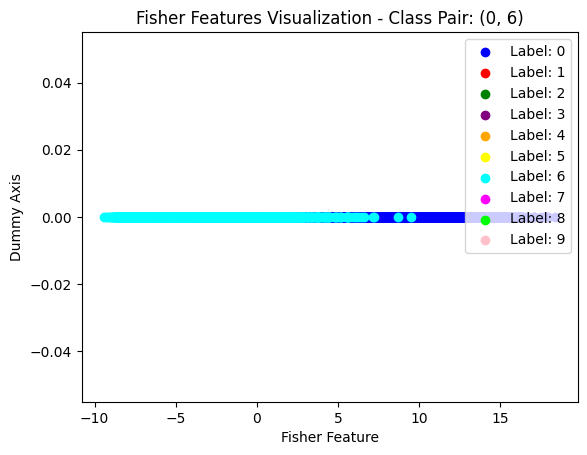

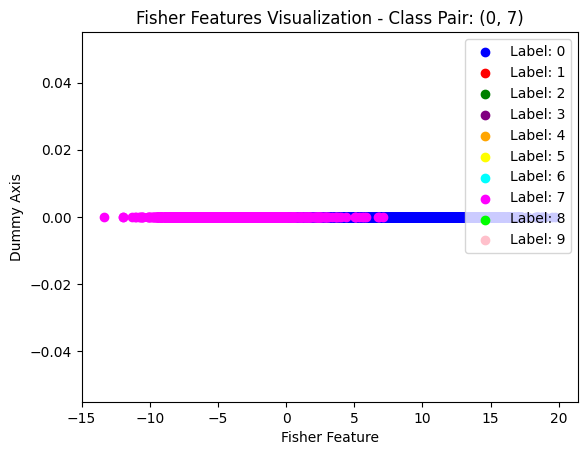

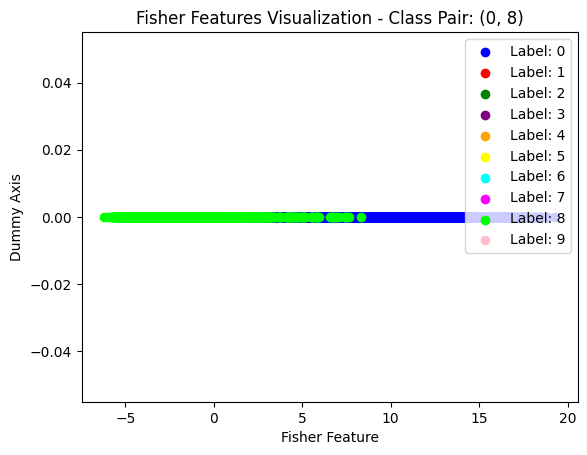

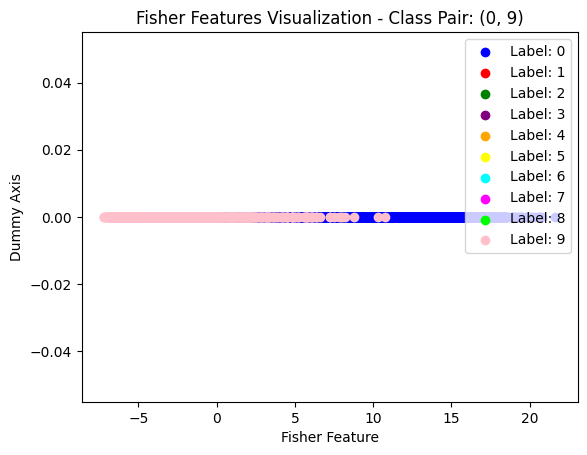

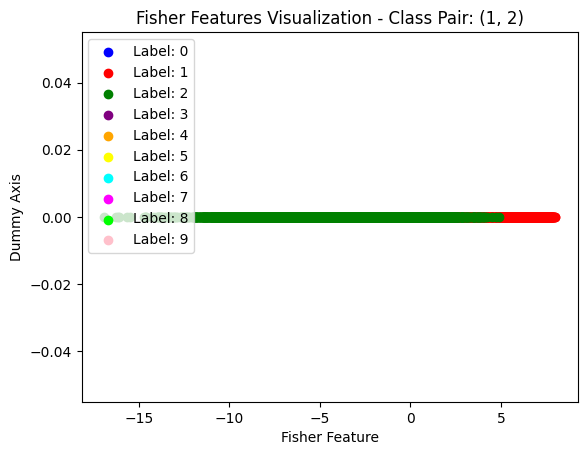

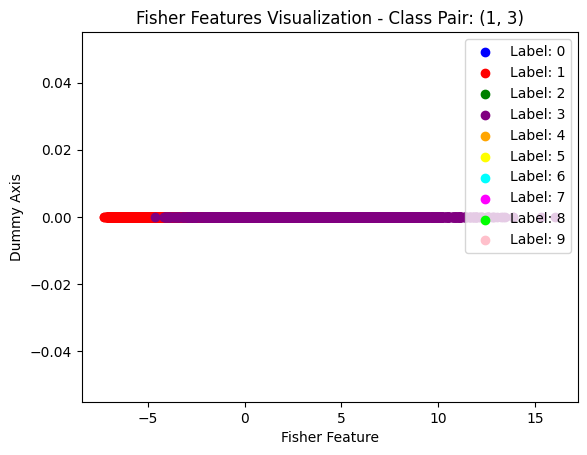

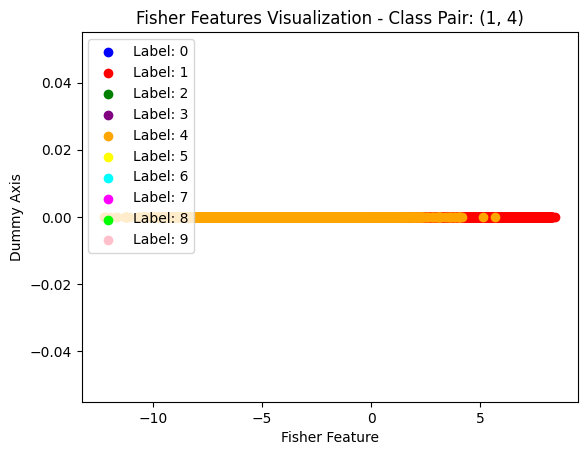

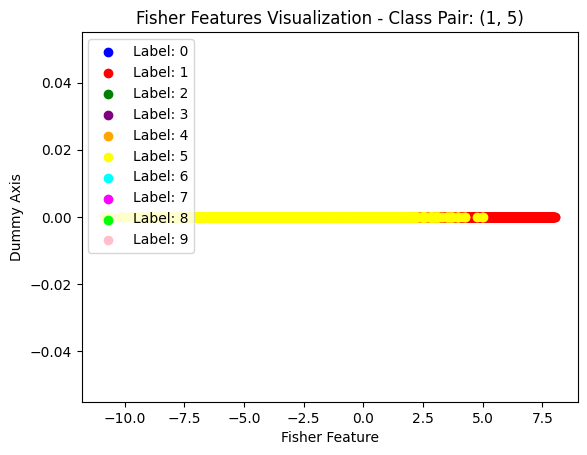

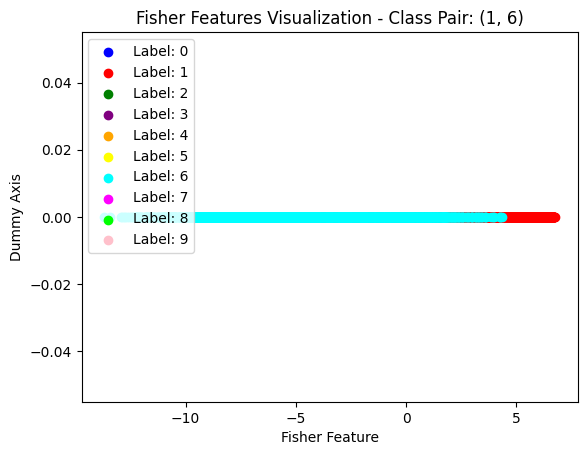

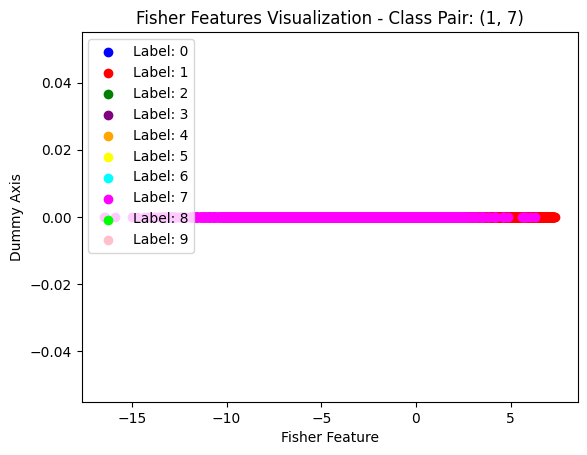

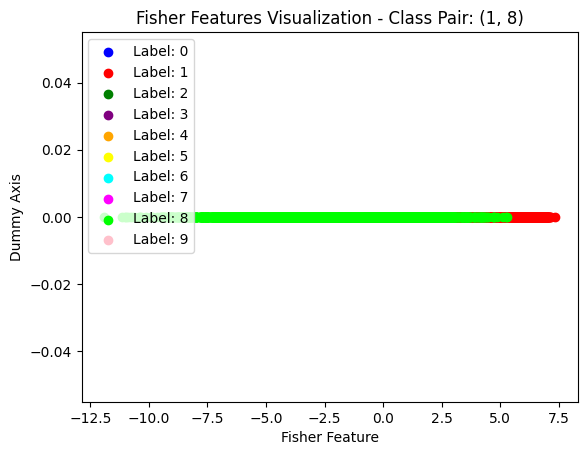

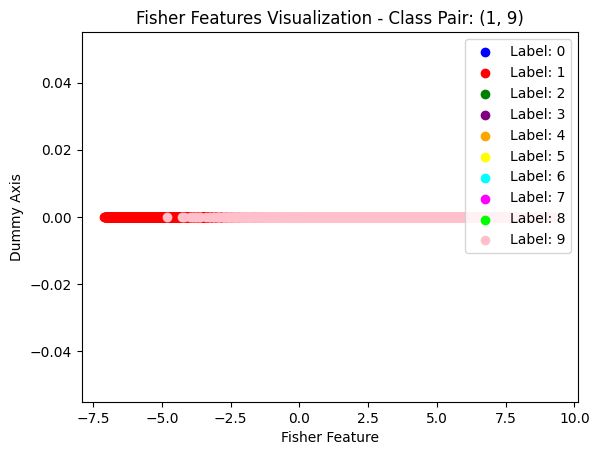

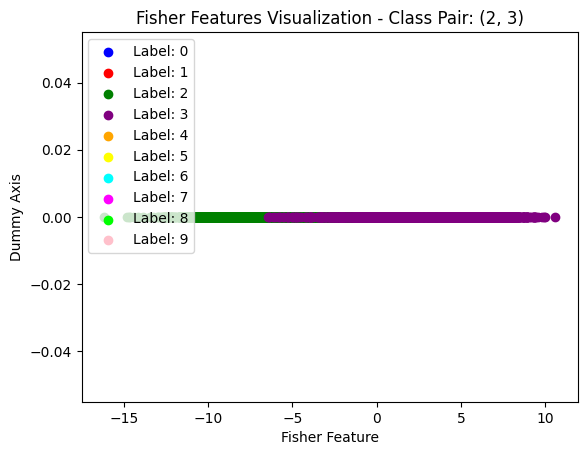

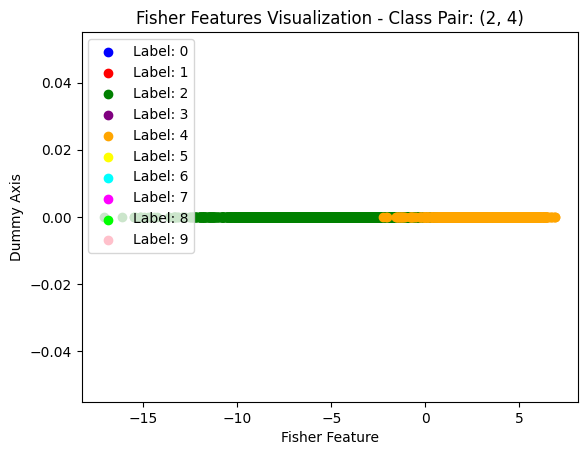

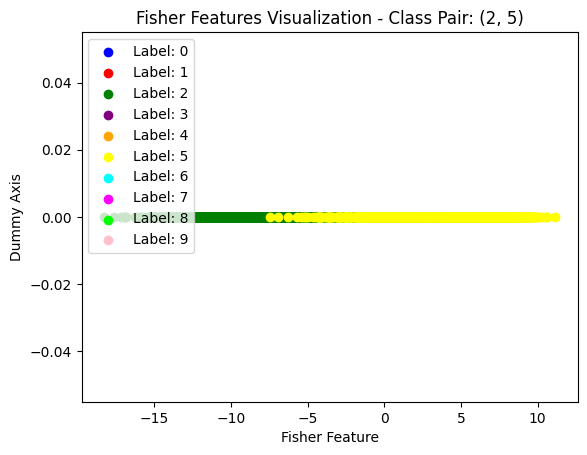

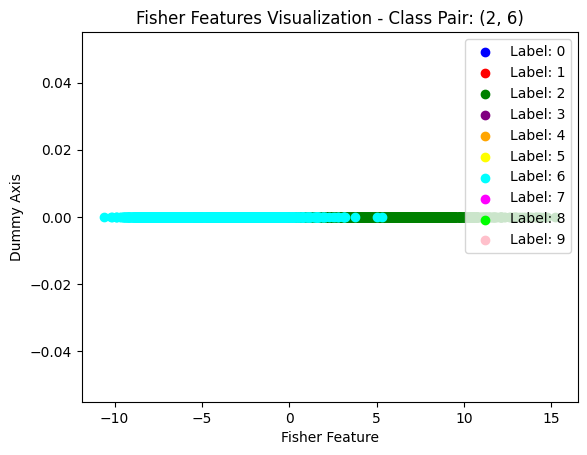

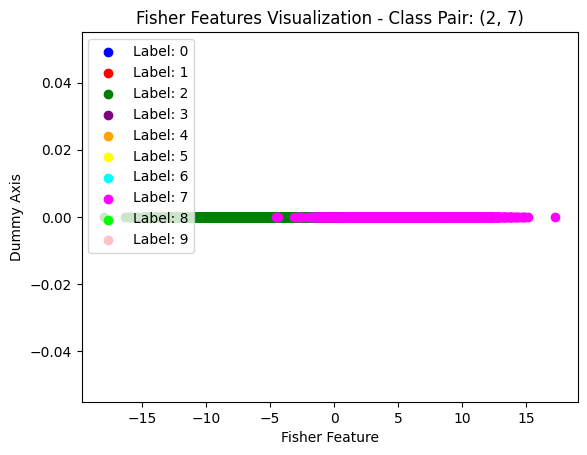

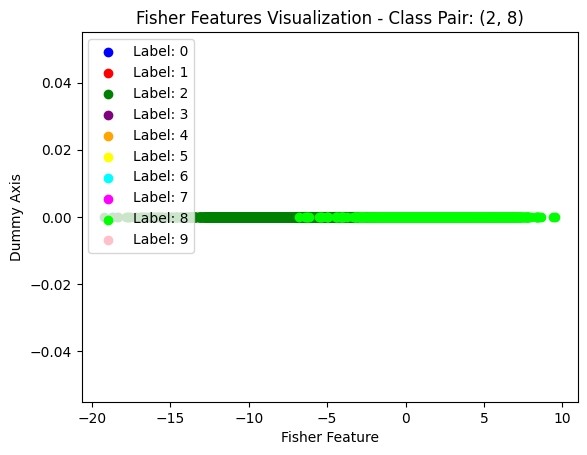

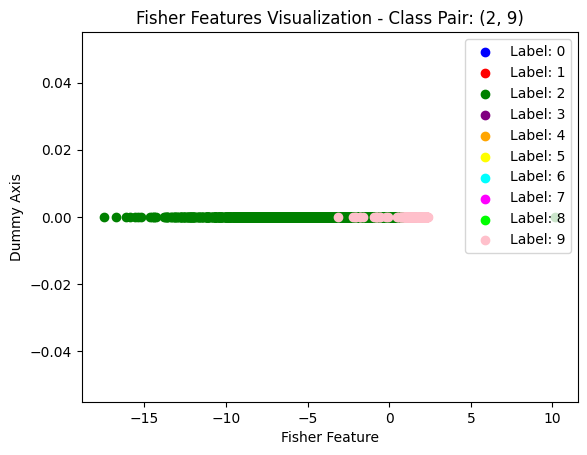

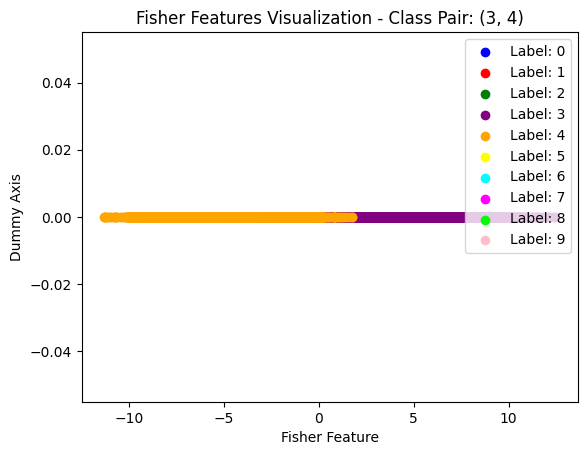

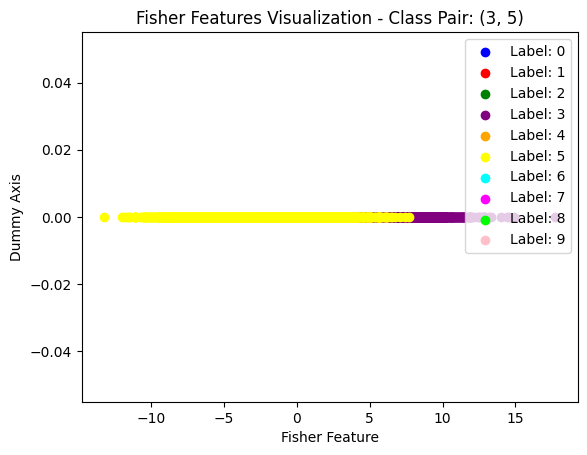

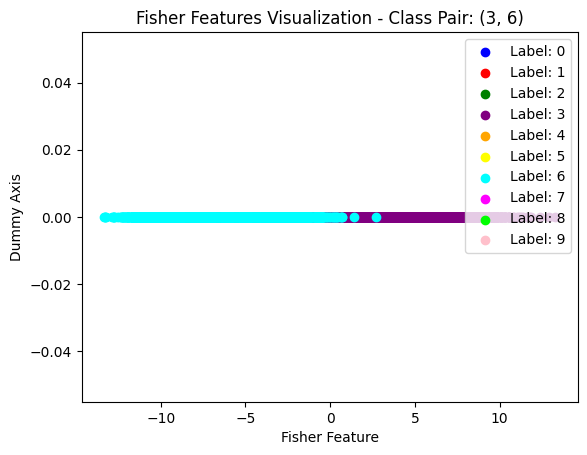

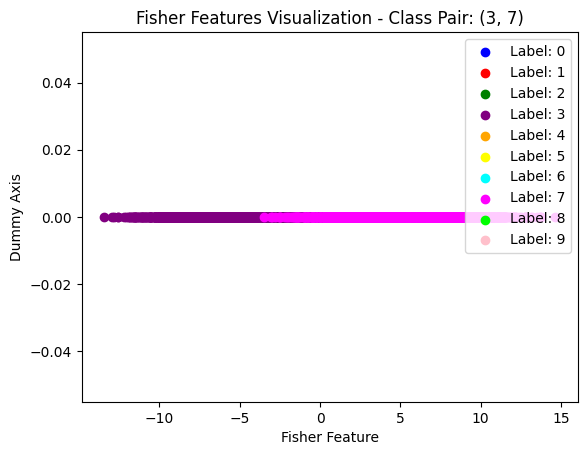

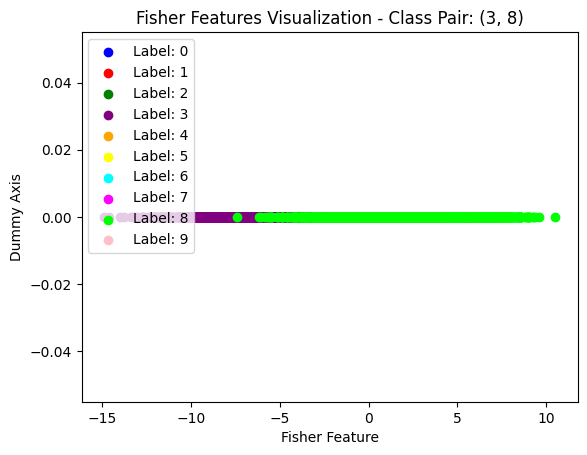

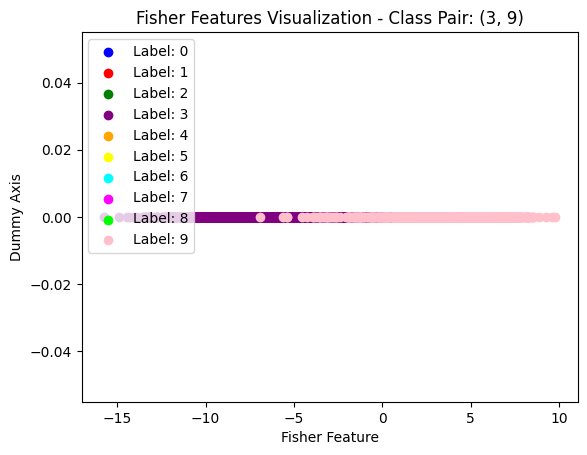

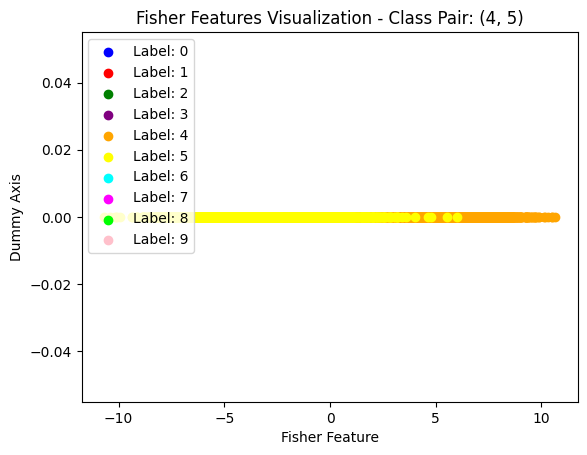

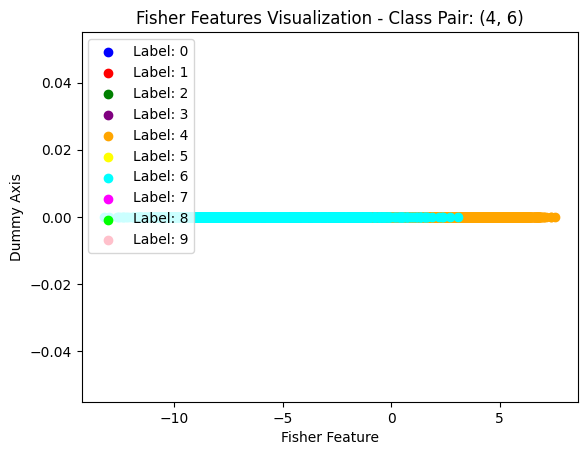

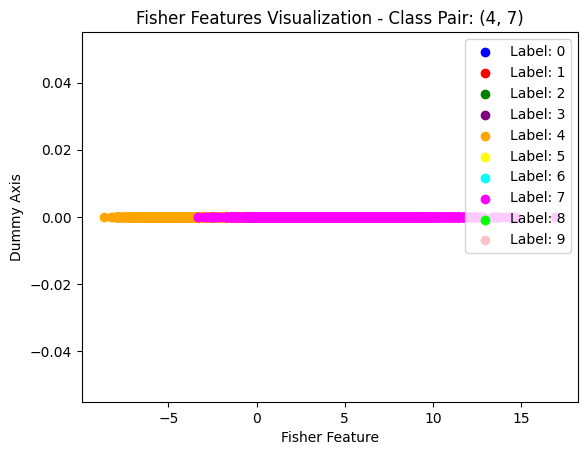

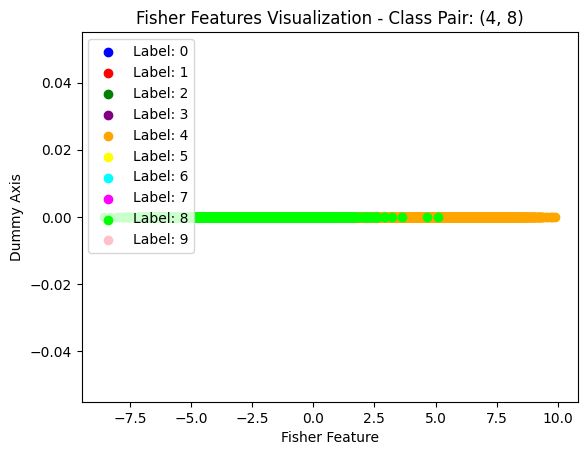

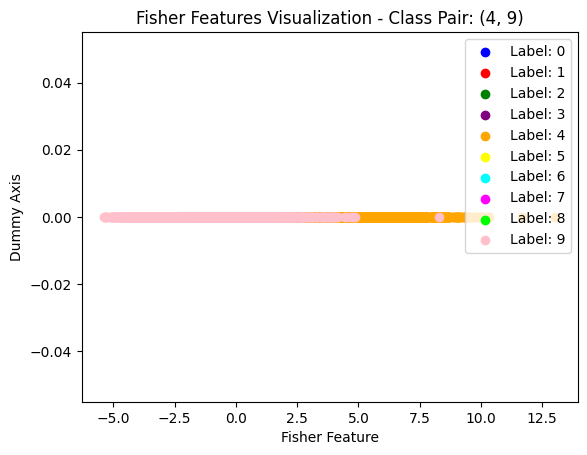

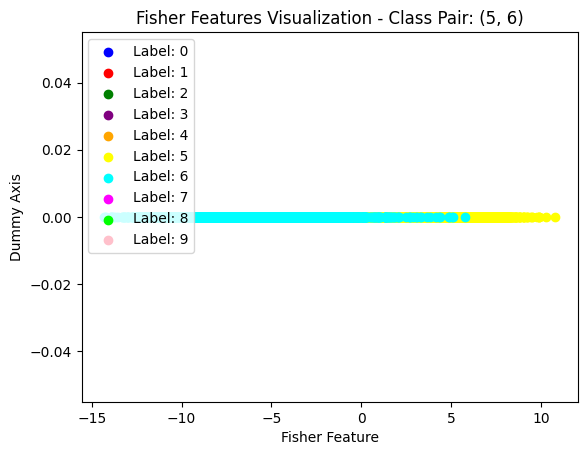

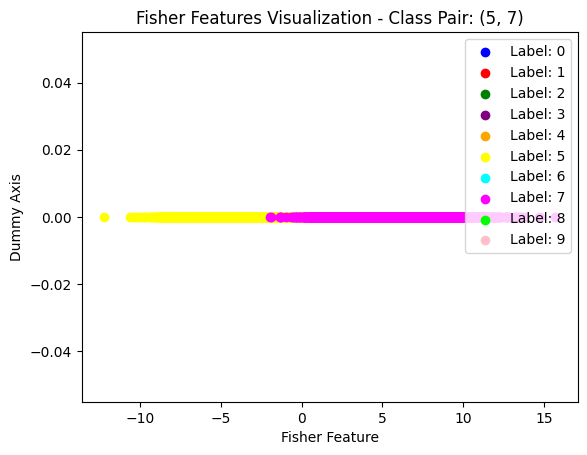

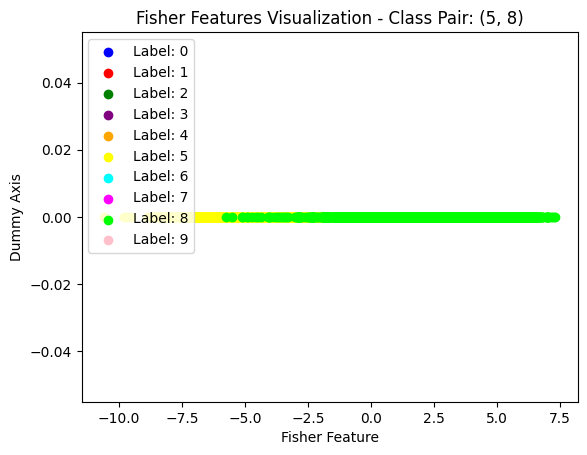

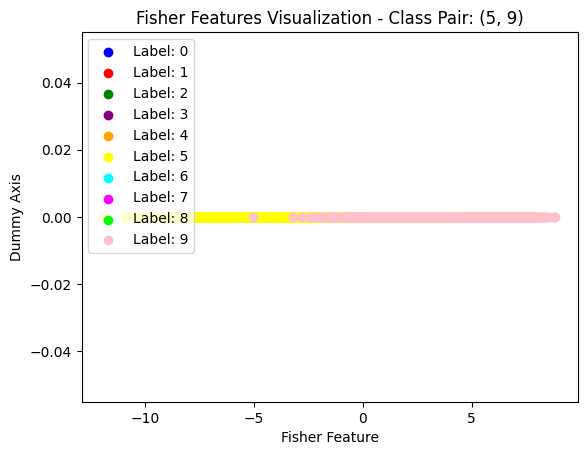

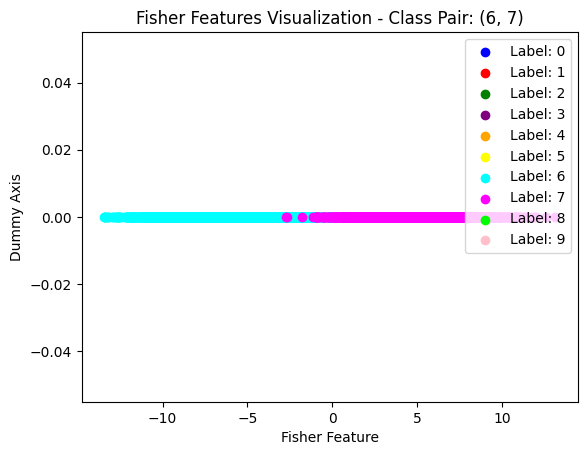

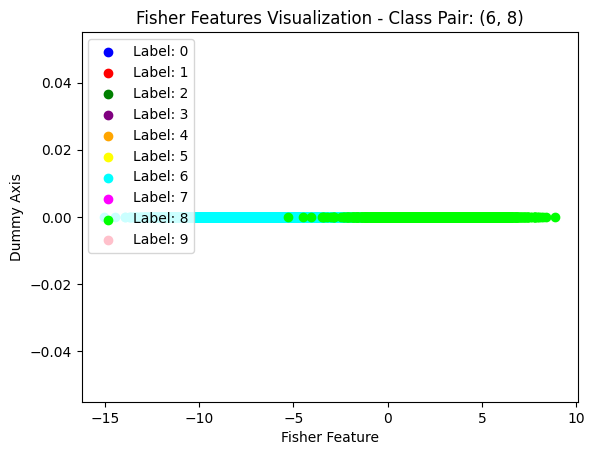

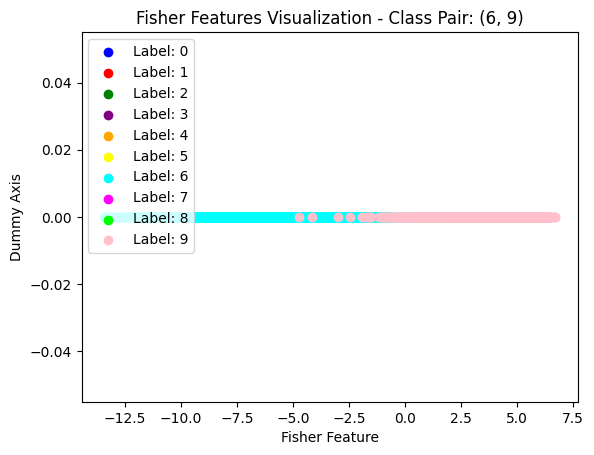

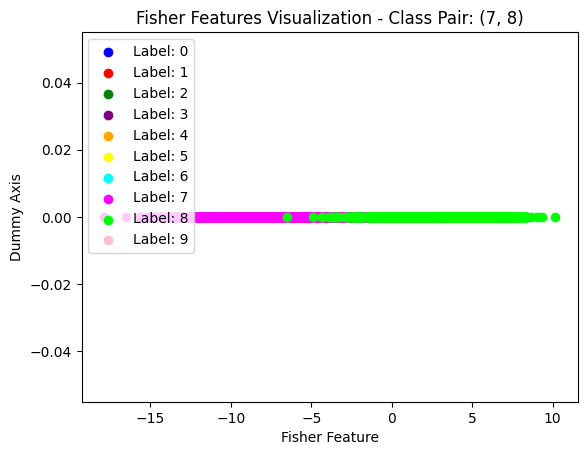

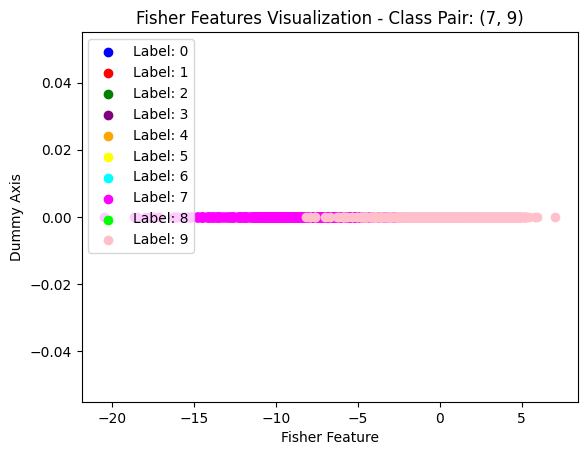

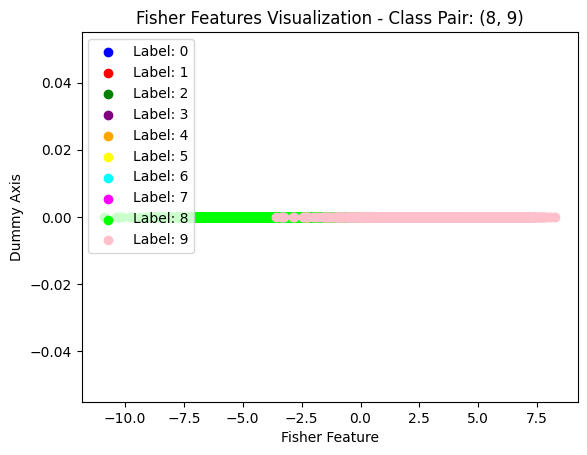

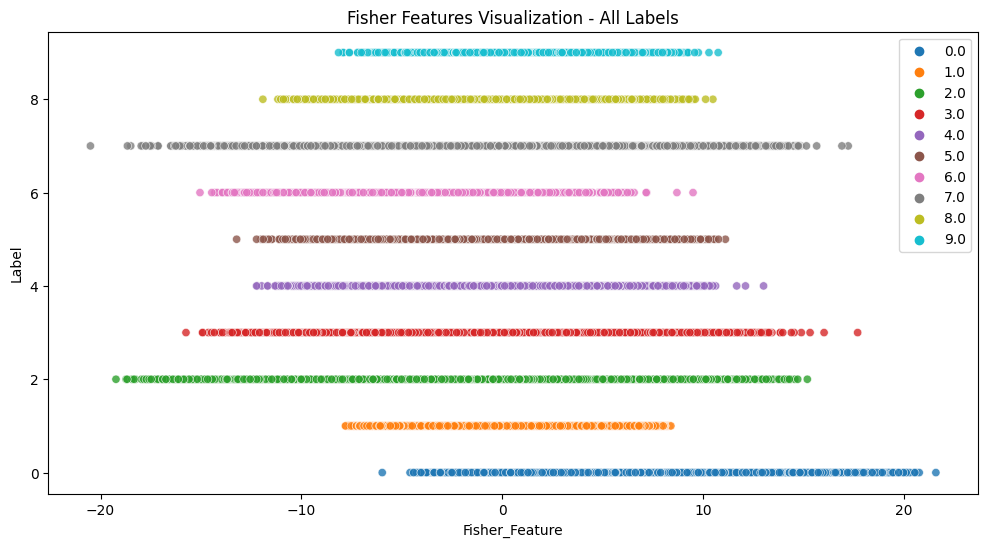

In [48]:
for idx, class_pair in enumerate(class_pairs):
    # Extract the indices corresponding to the two classes
    class_indices = np.where(np.logical_or(labels == class_pair[0], labels == class_pair[1]))[0]

    # Create subsets of features and labels for the class pair
    class_features = scaled_features[class_indices]
    class_labels = labels[class_indices]

    # Calculate class means for each class subset
    mean1 = np.mean(class_features[class_labels == class_pair[0]], axis=0)
    mean2 = np.mean(class_features[class_labels == class_pair[1]], axis=0)

    # Calculate the within-class scatter matrix (Sw)
    cov1 = np.cov(class_features[class_labels == class_pair[0]], rowvar=False)
    cov2 = np.cov(class_features[class_labels == class_pair[1]], rowvar=False)
    Sw = cov1 + cov2

    # Calculate the between-class scatter matrix (Sb)
    Sb = np.outer(mean1 - mean2, mean1 - mean2)

    # Calculate the Fisher Discriminant matrix (W)
    eigenvalues, eigenvectors = eigh(np.linalg.pinv(Sw).dot(Sb))
    sorted_indices = np.argsort(eigenvalues)[::-1]  # Sort eigenvalues in descending order
    W = eigenvectors[:, sorted_indices[:1]]  # Choose the top discriminant vector

    # Project the data onto the Fisher Discriminant vector
    # Adding epsilon to avoid division by zero for pixels with zero Fisher Discriminant
    fisher_features = class_features.dot(W) / (np.linalg.norm(W) + epsilon)

    # Assign the Fisher features back to their respective labels
    if idx == 0:
        fisher_values = np.hstack((fisher_features, class_labels.reshape(-1, 1)))
    else:
        fisher_values = np.vstack((fisher_values, np.hstack((fisher_features, class_labels.reshape(-1, 1)))))

    for label_value, color in zip(range(10), colors):
        plt.scatter(fisher_features[class_labels == label_value], np.zeros_like(fisher_features[class_labels == label_value]), color=color, label=f"Label: {label_value}")
    # Add legend and labels
    plt.legend()
    plt.xlabel("Fisher Feature")
    plt.ylabel("Dummy Axis")
    plt.title(f"Fisher Features Visualization - Class Pair: {class_pair}")
    plt.show()


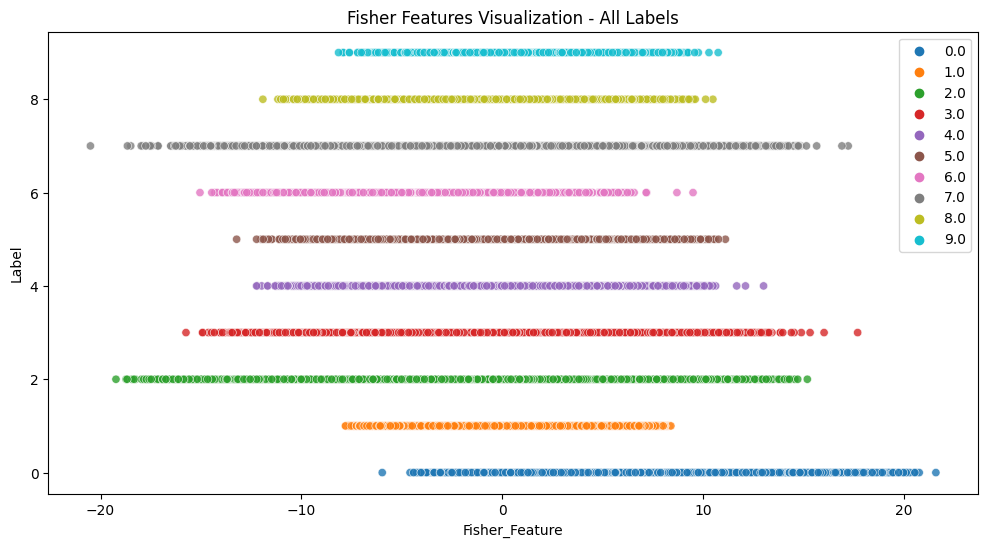

In [49]:
# Create a DataFrame containing all Fisher features and labels for all class pairs
fisher_values_all = pd.DataFrame(fisher_values, columns=["Fisher_Feature", "Label"])

# Visualization of all the labels using different colors
plt.figure(figsize=(12, 6))
sns.scatterplot(x="Fisher_Feature", y="Label", data=fisher_values_all, hue="Label", palette='tab10', alpha=0.8)
plt.legend()
plt.title("Fisher Features Visualization - All Labels")
plt.show()

(0, 1)
(8816, 784)
(8816,)


/var/folders/fm/2fp_968959s19ml1mctchvyc0000gn/T/ipykernel_89720/847058712.py:22: RuntimeWarning: divide by zero encountered in divide
  fisher = np.square(mean1 - mean2) / (cov1 + cov2)
/var/folders/fm/2fp_968959s19ml1mctchvyc0000gn/T/ipykernel_89720/847058712.py:22: RuntimeWarning: invalid value encountered in divide
  fisher = np.square(mean1 - mean2) / (cov1 + cov2)
/var/folders/fm/2fp_968959s19ml1mctchvyc0000gn/T/ipykernel_89720/847058712.py:29: RuntimeWarning: invalid value encountered in divide
  fisher_normalized = np.nan_to_num((fisher - np.min(fisher, axis=0)) / (np.max(fisher, axis=0) - np.min(fisher, axis=0)))


=====Fisher======
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
=====Fisher_Normalized======
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


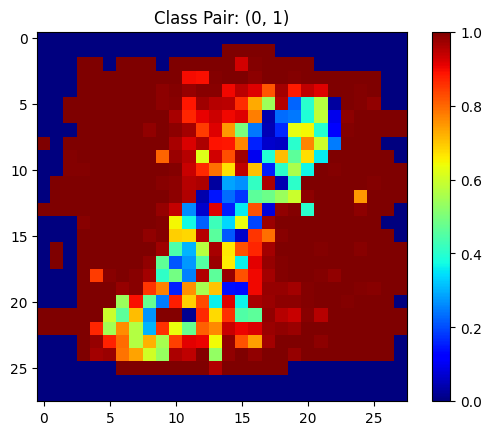

(0, 2)
(8309, 784)
(8309,)
=====Fisher======
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
=====Fisher_Normalized======
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


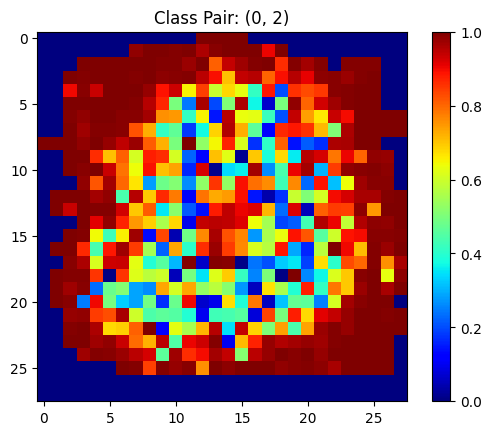

(0, 3)
(8483, 784)
(8483,)
=====Fisher======
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
=====Fisher_Normalized======
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


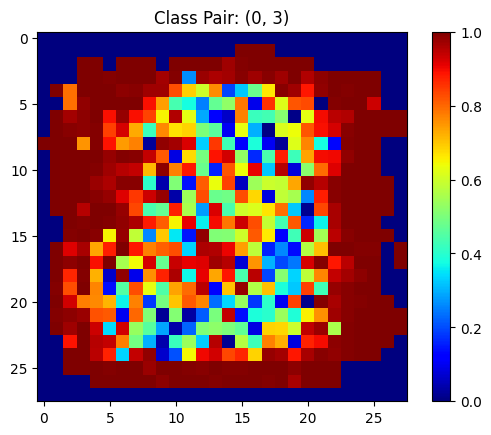

(0, 4)
(8204, 784)
(8204,)
=====Fisher======
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
=====Fisher_Normalized======
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


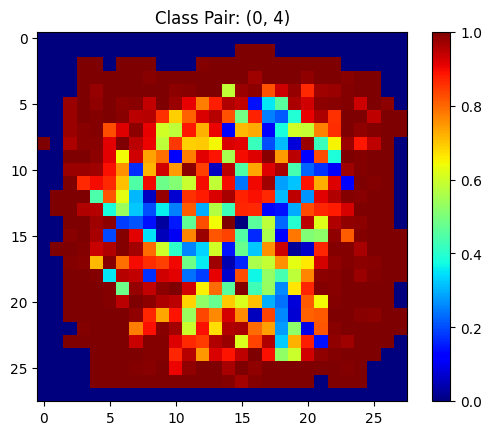

(0, 5)
(7927, 784)
(7927,)
=====Fisher======
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
=====Fisher_Normalized======
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


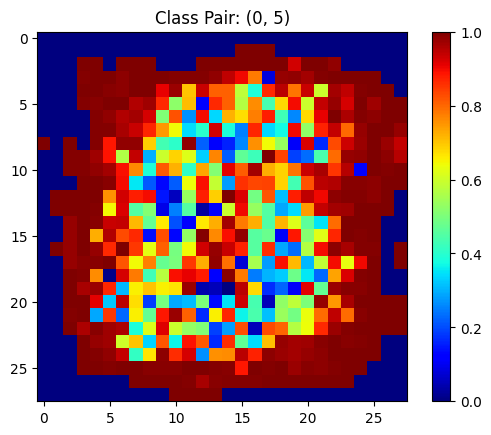

(0, 6)
(8269, 784)
(8269,)
=====Fisher======
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
=====Fisher_Normalized======
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


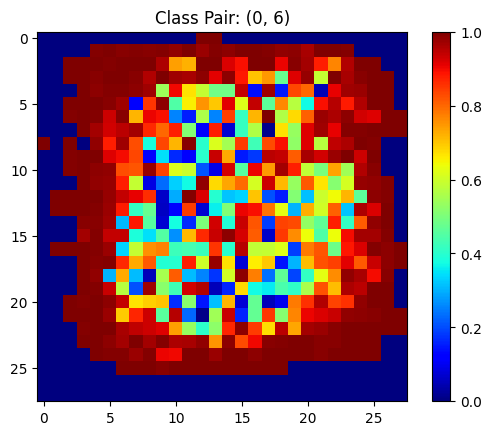

(0, 7)
(8533, 784)
(8533,)
=====Fisher======
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
=====Fisher_Normalized======
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


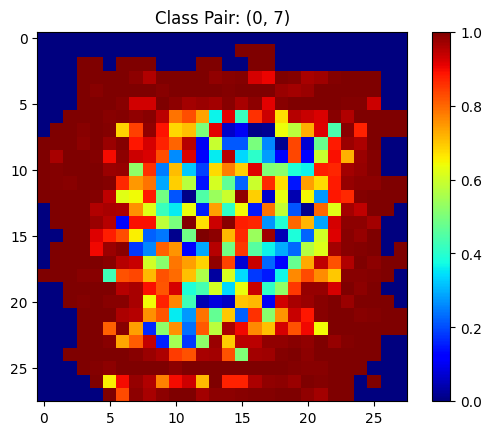

(0, 8)
(8195, 784)
(8195,)
=====Fisher======
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
=====Fisher_Normalized======
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


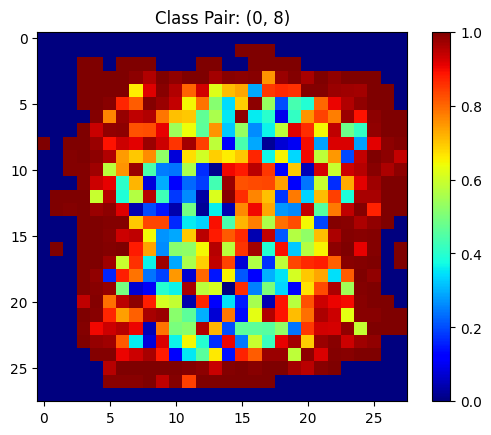

(0, 9)
(8320, 784)
(8320,)
=====Fisher======
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
=====Fisher_Normalized======
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


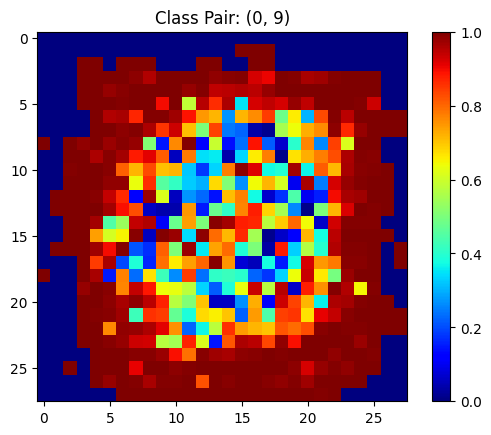

(1, 2)
(8861, 784)
(8861,)
=====Fisher======
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
=====Fisher_Normalized======
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


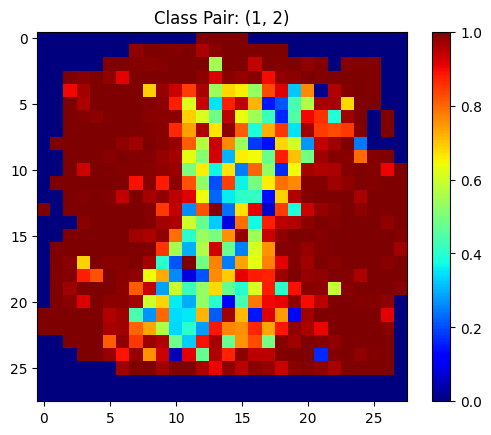

(1, 3)
(9035, 784)
(9035,)
=====Fisher======
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
=====Fisher_Normalized======
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


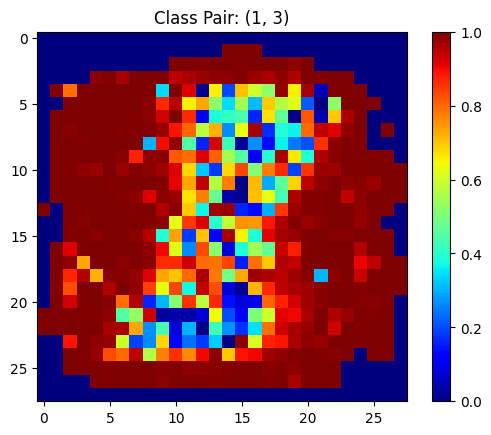

(1, 4)
(8756, 784)
(8756,)
=====Fisher======
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
=====Fisher_Normalized======
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


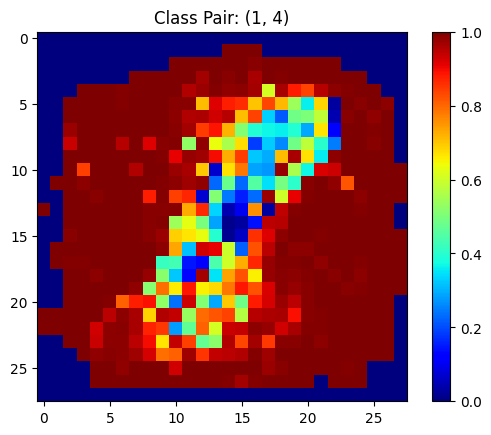

(1, 5)
(8479, 784)
(8479,)
=====Fisher======
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
=====Fisher_Normalized======
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


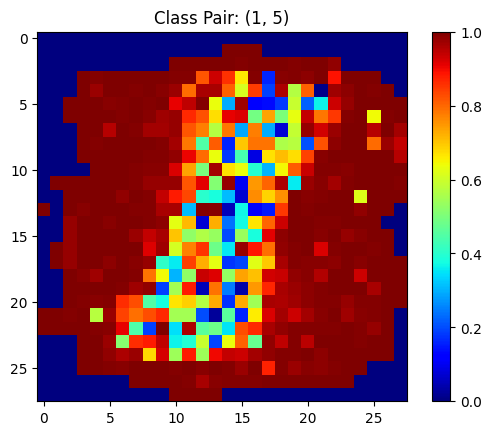

(1, 6)
(8821, 784)
(8821,)
=====Fisher======
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
=====Fisher_Normalized======
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


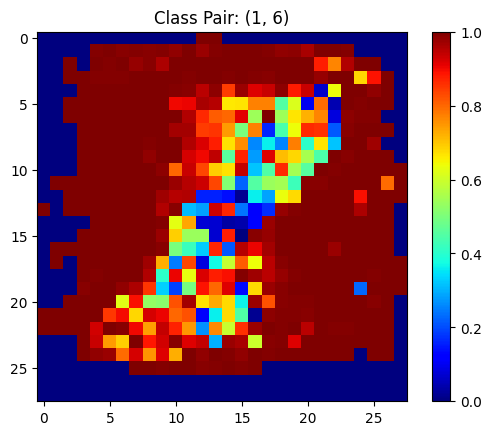

(1, 7)
(9085, 784)
(9085,)
=====Fisher======
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
=====Fisher_Normalized======
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


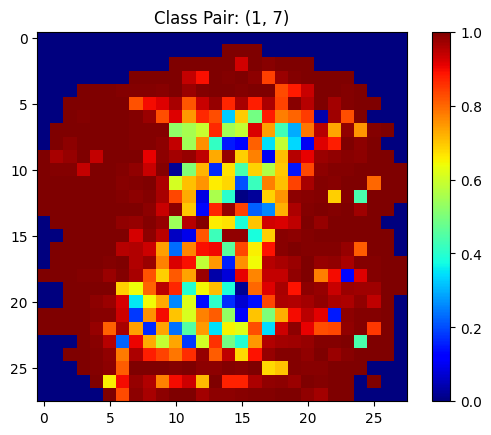

(1, 8)
(8747, 784)
(8747,)
=====Fisher======
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
=====Fisher_Normalized======
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


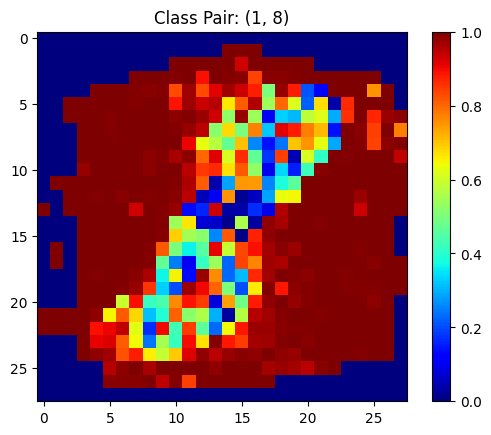

(1, 9)
(8872, 784)
(8872,)
=====Fisher======
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
=====Fisher_Normalized======
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


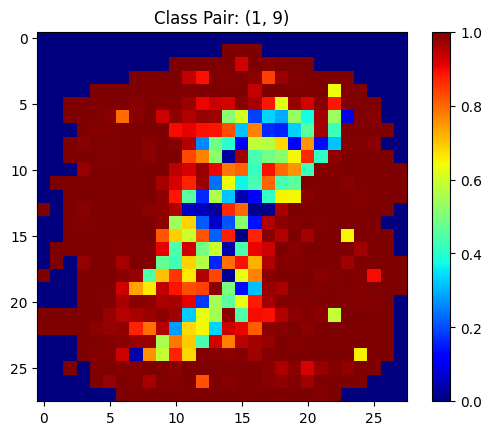

(2, 3)
(8528, 784)
(8528,)
=====Fisher======
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
=====Fisher_Normalized======
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


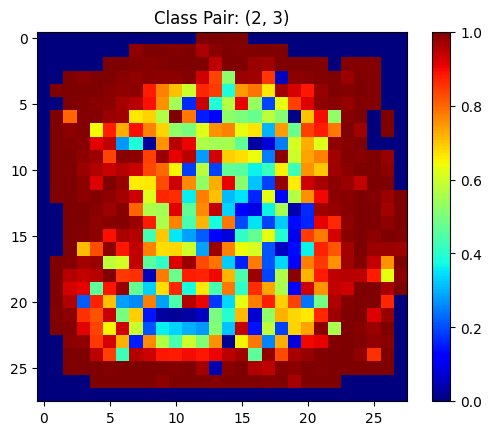

In [ ]:

# Iterate over each pair of classes
for idx, class_pair in enumerate(class_pairs):
    # Extract the indices corresponding to the two classes
    print(class_pair)
    class_indices = np.where(np.logical_or(labels == class_pair[0], labels == class_pair[1]))[0]
    
    # Create subsets of features and labels for the class pair
    class_features = features[class_indices]
    print(np.shape(class_features))
    class_labels = labels[class_indices]
    print(np.shape(class_labels))
    
    # Calculate class means for each class subset
    mean1 = np.mean(class_features[class_labels == class_pair[0]], axis=0)
    mean2 = np.mean(class_features[class_labels == class_pair[1]], axis=0)

    # Calculate class covariances for each class subset
    cov1 = np.cov(class_features[class_labels == class_pair[0]], rowvar=False)
    cov2 = np.cov(class_features[class_labels == class_pair[1]], rowvar=False)
    
    # Calculate the Fisher Discriminant for each pixel
    fisher = np.square(mean1 - mean2) / (cov1 + cov2)
    fisher = np.nan_to_num(fisher, nan=0, posinf=0, neginf=0)
    
    print("=====Fisher======")
    print(fisher)
    
    # Normalize the Fisher discriminant values for each feature
    fisher_normalized = np.nan_to_num((fisher - np.min(fisher, axis=0)) / (np.max(fisher, axis=0) - np.min(fisher, axis=0)))
    print("=====Fisher_Normalized======")
    print(fisher_normalized)
    
    fisher_image = fisher_normalized[0].reshape(28, 28)  # Reshape to the original image size
    
    # Convert the Fisher image to a DataFrame
    fisher_df = pd.DataFrame(fisher_image)

    # Write the DataFrame to a CSV file
    file_path = f"fisher_image_{class_pair}.csv"
    fisher_df.to_csv(file_path, index=False)

    # Plot the Fisher image
    plt.imshow(fisher_image, cmap='jet', vmin=0, vmax=1)
    plt.title(f"Class Pair: {class_pair}")
    plt.colorbar()
    plt.show()
    

Question 2
Parameter Sweep over Decision Trees
- Dataset: https://www.kaggle.com/uciml/mushroom-classification
- Divide it randomly into 65% training and 35% test data
- Build a Decision Tree classifier with the following hyper-parameter combinations:
- o (Im)PurityMeasure:Entropy
- o Maximum Depth:1, 2, 3, 4, 5, 6, 7 
- o PurityThreshold:0.6,0.7,0.8,0.9 
- o SizeThreshold:Verylow
- Create a 2-D Table (Depth vs. Purity) above values
- In each cell, write the “Training” and “Test” accuracy
- Make an observation about the best parameter combination
- Draw the decision tree using the tools available
- Write down the rules learnt by this decision tree

In [114]:
#Install required dependencies
!pip install graphviz
!pip install pydotplus
!pip install pydot

In [115]:
import shutil
shutil.which('dot')

'/usr/local/bin/dot'

In [145]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, export_graphviz, export_text
from sklearn.metrics import accuracy_score
import graphviz
import pydot
from IPython.display import Image
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

# Load the dataset
data = pd.read_csv('mushrooms.csv')
print(data)


     class cap-shape cap-surface cap-color bruises odor gill-attachment  \
0        p         x           s         n       t    p               f   
1        e         x           s         y       t    a               f   
2        e         b           s         w       t    l               f   
3        p         x           y         w       t    p               f   
4        e         x           s         g       f    n               f   
...    ...       ...         ...       ...     ...  ...             ...   
8119     e         k           s         n       f    n               a   
8120     e         x           s         n       f    n               a   
8121     e         f           s         n       f    n               a   
8122     p         k           y         n       f    y               f   
8123     e         x           s         n       f    n               a   

     gill-spacing gill-size gill-color  ... stalk-surface-below-ring  \
0               c         n

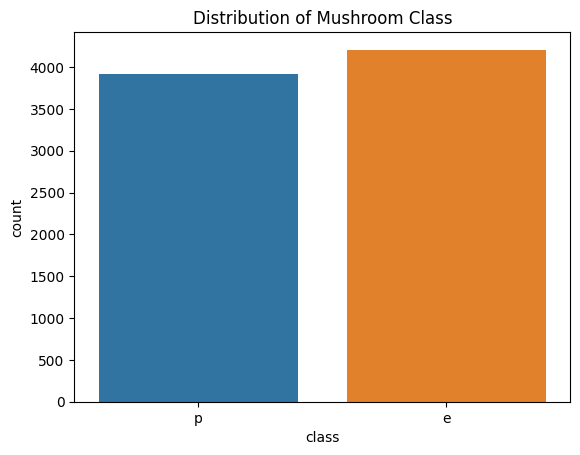

In [146]:

# Visualize the distribution of class (target variable)
sns.countplot(x='class', data=data)
plt.title('Distribution of Mushroom Class')
plt.show()


In [147]:
# Get summary statistics
summary_stats = data.describe()
print(summary_stats)

       class cap-shape cap-surface cap-color bruises  odor gill-attachment  \
count   8124      8124        8124      8124    8124  8124            8124   
unique     2         6           4        10       2     9               2   
top        e         x           y         n       f     n               f   
freq    4208      3656        3244      2284    4748  3528            7914   

       gill-spacing gill-size gill-color  ... stalk-surface-below-ring  \
count          8124      8124       8124  ...                     8124   
unique            2         2         12  ...                        4   
top               c         b          b  ...                        s   
freq           6812      5612       1728  ...                     4936   

       stalk-color-above-ring stalk-color-below-ring veil-type veil-color  \
count                    8124                   8124      8124       8124   
unique                      9                      9         1          4   
top    

In [148]:
# Get value counts for each categorical column
for column in data.columns:
    if data[column].dtype == 'object':
        value_counts = data[column].value_counts()
        print(f'Value counts for {column}:\n{value_counts}\n')


Value counts for class:
e    4208
p    3916
Name: class, dtype: int64

Value counts for cap-shape:
x    3656
f    3152
k     828
b     452
s      32
c       4
Name: cap-shape, dtype: int64

Value counts for cap-surface:
y    3244
s    2556
f    2320
g       4
Name: cap-surface, dtype: int64

Value counts for cap-color:
n    2284
g    1840
e    1500
y    1072
w    1040
b     168
p     144
c      44
u      16
r      16
Name: cap-color, dtype: int64

Value counts for bruises:
f    4748
t    3376
Name: bruises, dtype: int64

Value counts for odor:
n    3528
f    2160
y     576
s     576
a     400
l     400
p     256
c     192
m      36
Name: odor, dtype: int64

Value counts for gill-attachment:
f    7914
a     210
Name: gill-attachment, dtype: int64

Value counts for gill-spacing:
c    6812
w    1312
Name: gill-spacing, dtype: int64

Value counts for gill-size:
b    5612
n    2512
Name: gill-size, dtype: int64

Value counts for gill-color:
b    1728
p    1492
w    1202
n    1048
g     752


In [149]:
# Check for missing values
missing_values = data.isnull().sum()
print(missing_values)


class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64


In [151]:
X = data.drop(columns=["class"], axis = 1)
y = data["class"]

In [167]:
# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.35, random_state=42)


In [168]:
def prepare_inputs(X_train, X_test):
    oe = OrdinalEncoder()
    oe.fit(X_train)
    X_train_enc = oe.transform(X_train)
    X_test_enc = oe.transform(X_test)
    return X_train_enc, X_test_enc

In [169]:
def prepare_targets(y_train, y_test):
    le = LabelEncoder()
    le.fit(y_train)
    y_train_enc = le.transform(y_train)
    y_test_enc = le.transform(y_test)
    return y_train_enc, y_test_enc

In [170]:
def select_features(X_train, y_train, X_test):
    fs = SelectKBest(score_func=chi2, k='all')
    fs.fit(X_train, y_train)
    X_train_fs = fs.transform(X_train)
    X_test_fs = fs.transform(X_test)
    return X_train_fs, X_test_fs, fs

In [171]:
X_train_enc, X_test_enc = prepare_inputs(X_train, X_test)
y_train_enc, y_test_enc = prepare_targets(y_train, y_test)
X_train_fs, X_test_fs, fs = select_features(X_train_enc, y_train_enc, X_test_enc)

In [177]:
chi2_scores = fs.scores_
p_values = fs.pvalues_

# Print the scores and p-values for each feature
print("Feature Importance Scores and P-Values:")
for i, (feature_name, score, p_value) in enumerate(zip(X_train.columns, chi2_scores, p_values)):
    print(f"Feature {i}: {feature_name}: Score: {score}, P-Value: {p_value}")


Feature Importance Scores and P-Values:
Feature 0: cap-shape: Score: 9.711366105250573, P-Value: 0.001831318318224754
Feature 1: cap-surface: Score: 141.82567996906582, P-Value: 1.0616895459727898e-32
Feature 2: cap-color: Score: 5.070179659263042, P-Value: 0.024340860778149606
Feature 3: bruises: Score: 803.3438490786097, P-Value: 1.0116959836333559e-176
Feature 4: odor: Score: 53.7179884217406, P-Value: 2.314345269293311e-13
Feature 5: gill-attachment: Score: 2.308494288061226, P-Value: 0.12866863627288935
Feature 6: gill-spacing: Score: 525.1183145149148, P-Value: 3.258330760372965e-116
Feature 7: gill-size: Score: 1092.019481262711, P-Value: 1.792299793334469e-239
Feature 8: gill-color: Score: 4027.4737706827955, P-Value: 0.0
Feature 9: stalk-shape: Score: 22.74612602196407, P-Value: 1.8487645928759732e-06
Feature 10: stalk-root: Score: 771.4919081156924, P-Value: 8.51871314964606e-170
Feature 11: stalk-surface-above-ring: Score: 144.79467347170456, P-Value: 2.3815003104071464e-33


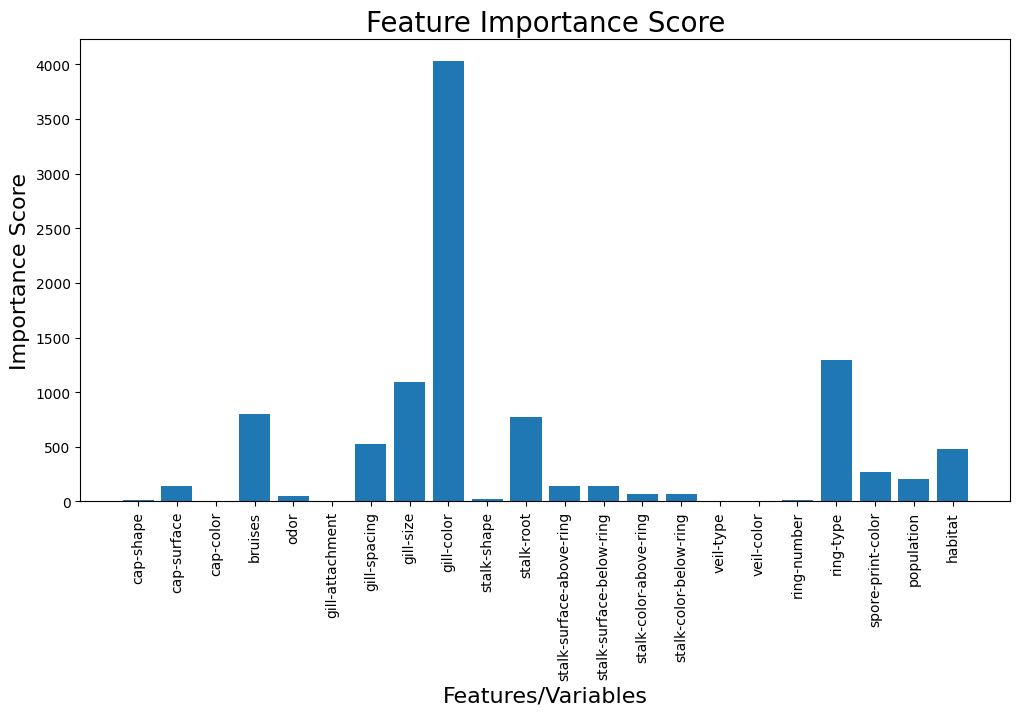

In [179]:
# plot the scores
plt.figure(figsize=(12, 6))
plt.bar(X_train.columns, fs.scores_)
plt.title("Feature Importance Score", size=20)
plt.xlabel("Features/Variables", size=16, color="black")
plt.ylabel("Importance Score", size=16, color="black")
plt.xticks(rotation=90)
plt.show()


In [185]:
# Get the feature indices to keep based on the threshold
selected_feature_indices = fs.scores_ > 143
print(selected_feature_indices)
# Get the column names of the selected features
selected_features = X_train.columns[selected_feature_indices]

# Drop the non-selected features from the training and test sets
# X_train_selected = X_train[selected_features]
# X_test_selected = X_test[selected_features]

print("Selected Features:")
print(selected_features)

[False False False  True False False  True  True  True False  True  True
 False False False False False False  True  True  True  True]
Selected Features:
Index(['bruises', 'gill-spacing', 'gill-size', 'gill-color', 'stalk-root',
       'stalk-surface-above-ring', 'ring-type', 'spore-print-color',
       'population', 'habitat'],
      dtype='object')


In [184]:
# Create a DataFrame to store feature importances, scores, and p-values
feature_importance_df = pd.DataFrame({'Feature': X_train.columns, 'Score': chi2_scores, 'P-Value': p_values})

# Sort the features based on p-values in ascending order
sorted_features = feature_importance_df.sort_values(by='P-Value')

# Set the threshold for p-values (e.g., 0.05)
threshold_p_value = 0.05

# Filter the features based on the threshold
selected_features = sorted_features[sorted_features['P-Value'] < threshold_p_value].head(10)

# Get the names of the selected features
selected_feature_names = selected_features['Feature'].tolist()
print(selected_feature_names)


['gill-color', 'ring-type', 'gill-size', 'bruises', 'stalk-root', 'gill-spacing', 'habitat', 'spore-print-color', 'population', 'stalk-surface-above-ring']


In [189]:
selected_feature_names.append('class')
print(selected_feature_names)
# Create the new subset DataFrame with selected columns
subset_data = data[selected_feature_names].copy()
print(subset_data)


['gill-color', 'ring-type', 'gill-size', 'bruises', 'stalk-root', 'gill-spacing', 'habitat', 'spore-print-color', 'population', 'stalk-surface-above-ring', 'class']
     gill-color ring-type gill-size bruises stalk-root gill-spacing habitat  \
0             k         p         n       t          e            c       u   
1             k         p         b       t          c            c       g   
2             n         p         b       t          c            c       m   
3             n         p         n       t          e            c       u   
4             k         e         b       f          e            w       g   
...         ...       ...       ...     ...        ...          ...     ...   
8119          y         p         b       f          ?            c       l   
8120          y         p         b       f          ?            c       l   
8121          n         p         b       f          ?            c       l   
8122          b         e         n       f  

In [190]:
# One-hot encode categorical features
data_encoded = pd.get_dummies(subset_data, drop_first=True)
print(data_encoded)
# Separate features and labels
features = data_encoded.drop('class_p', axis=1)  # Drop one class column to avoid multicollinearity
labels = data_encoded['class_p']

      gill-color_e  gill-color_g  gill-color_h  gill-color_k  gill-color_n  \
0                0             0             0             1             0   
1                0             0             0             1             0   
2                0             0             0             0             1   
3                0             0             0             0             1   
4                0             0             0             1             0   
...            ...           ...           ...           ...           ...   
8119             0             0             0             0             0   
8120             0             0             0             0             0   
8121             0             0             0             0             1   
8122             0             0             0             0             0   
8123             0             0             0             0             0   

      gill-color_o  gill-color_p  gill-color_r  gill-color_u  g

In [195]:
# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.35, random_state=42)
X_train.shape , X_test.shape


((5280, 44), (2844, 44))

In [196]:
y_train.shape , y_test.shape

((5280,), (2844,))

In [203]:

# Define the hyperparameter combinations
impurity_measures = ['entropy']
max_depths = [1, 2, 3, 4, 5, 6, 7]
purity_thresholds = [0.6, 0.7, 0.8, 0.9]

# Create a DataFrame to store the results
results_df = pd.DataFrame(columns=['Impurity Measure', 'Max Depth', 'Purity Threshold', 'Training Accuracy', 'Test Accuracy'])


/var/folders/fm/2fp_968959s19ml1mctchvyc0000gn/T/ipykernel_63473/467679914.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
/var/folders/fm/2fp_968959s19ml1mctchvyc0000gn/T/ipykernel_63473/467679914.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
/var/folders/fm/2fp_968959s19ml1mctchvyc0000gn/T/ipykernel_63473/467679914.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
/var/folders/fm/2fp_968959s19ml1mctchvyc0000gn/T/ipykernel_63473/467679914.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
/var/folders/fm/2fp_968959s19ml1mctchvyc0000gn/T/ipykernel_63473/467679914.py:20: FutureWarning: The frame.append method is deprecated and w

                 Test Accuracy                                \
Purity Threshold           0.6       0.7       0.8       0.9   
Max Depth                                                      
1                     0.517229  0.517229  0.517229  0.517229   
2                     0.517229  0.517229  0.517229  0.517229   
3                     0.517229  0.517229  0.517229  0.517229   
4                     0.517229  0.517229  0.517229  0.517229   
5                     0.517229  0.517229  0.517229  0.517229   
6                     0.517229  0.517229  0.517229  0.517229   
7                     0.517229  0.517229  0.517229  0.517229   

                 Training Accuracy                                
Purity Threshold               0.6       0.7       0.8       0.9  
Max Depth                                                         
1                         0.518371  0.518371  0.518371  0.518371  
2                         0.518371  0.518371  0.518371  0.518371  
3                       

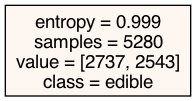

In [204]:

# Iterate over the hyperparameter combinations
for impurity in impurity_measures:
    for max_depth in max_depths:
        for purity_threshold in purity_thresholds:
            # Create an instance of the Decision Tree classifier
            dt_classifier = DecisionTreeClassifier(criterion=impurity, max_depth=max_depth, min_impurity_decrease=purity_threshold, min_samples_leaf=1)

            # Fit the classifier on the training data
            dt_classifier.fit(X_train, y_train)

            # Predict labels for training and test data
            train_predictions = dt_classifier.predict(X_train)
            test_predictions = dt_classifier.predict(X_test)

            # Calculate training and test accuracies
            train_accuracy = accuracy_score(y_train, train_predictions)
            test_accuracy = accuracy_score(y_test, test_predictions)

            # Store the results in the DataFrame
            results_df = results_df.append({'Impurity Measure': impurity, 'Max Depth': max_depth, 'Purity Threshold': purity_threshold,
                                            'Training Accuracy': train_accuracy, 'Test Accuracy': test_accuracy}, ignore_index=True)

# Create a 2-D table (Depth vs. Purity)
pivot_table = results_df.pivot_table(values=['Training Accuracy', 'Test Accuracy'], index='Max Depth', columns='Purity Threshold')

print(pivot_table)

# Find the best parameter combination based on test accuracy
best_combination = results_df.loc[results_df['Test Accuracy'].idxmax()]

# Draw the decision tree based on the best parameter combination
dt_classifier = DecisionTreeClassifier(criterion=best_combination['Impurity Measure'], max_depth=best_combination['Max Depth'],
                                       min_impurity_decrease=best_combination['Purity Threshold'], min_samples_leaf=1)
dt_classifier.fit(X_train, y_train)

# Get the textual representation of the Decision Tree rules
tree_rules = export_text(dt_classifier, feature_names=list(X_train.columns))
print(tree_rules)

# Visualize the decision tree using pydot
dot_data = export_graphviz(dt_classifier, out_file=None, feature_names=list(X_train.columns),
                           class_names=['edible', 'poisonous'], filled=True)
graph = pydot.graph_from_dot_data(dot_data)

# Render the Decision Tree in Jupyter Notebook
Image(graph[0].create_png())


In [205]:

# Define the hyperparameter combinations
impurity_measures = ['entropy']
max_depths = [1, 2, 3, 4, 5, 6, 7]
purity_thresholds = [0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]

# Create a DataFrame to store the results
results_df = pd.DataFrame(columns=['Impurity Measure', 'Max Depth', 'Purity Threshold', 'Training Accuracy', 'Test Accuracy'])


/var/folders/fm/2fp_968959s19ml1mctchvyc0000gn/T/ipykernel_63473/467679914.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
/var/folders/fm/2fp_968959s19ml1mctchvyc0000gn/T/ipykernel_63473/467679914.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
/var/folders/fm/2fp_968959s19ml1mctchvyc0000gn/T/ipykernel_63473/467679914.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
/var/folders/fm/2fp_968959s19ml1mctchvyc0000gn/T/ipykernel_63473/467679914.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
/var/folders/fm/2fp_968959s19ml1mctchvyc0000gn/T/ipykernel_63473/467679914.py:20: FutureWarning: The frame.append method is deprecated and w

/var/folders/fm/2fp_968959s19ml1mctchvyc0000gn/T/ipykernel_63473/467679914.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
/var/folders/fm/2fp_968959s19ml1mctchvyc0000gn/T/ipykernel_63473/467679914.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
/var/folders/fm/2fp_968959s19ml1mctchvyc0000gn/T/ipykernel_63473/467679914.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
/var/folders/fm/2fp_968959s19ml1mctchvyc0000gn/T/ipykernel_63473/467679914.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
/var/folders/fm/2fp_968959s19ml1mctchvyc0000gn/T/ipykernel_63473/467679914.py:20: FutureWarning: The frame.append method is deprecated and w

                 Test Accuracy                                          \
Purity Threshold           0.0       0.1       0.2       0.3       0.4   
Max Depth                                                                
1                     0.765471  0.765471  0.765471  0.517229  0.517229   
2                     0.917018  0.896624  0.896624  0.517229  0.517229   
3                     0.963080  0.932138  0.896624  0.517229  0.517229   
4                     0.977145  0.932138  0.896624  0.517229  0.517229   
5                     0.985584  0.932138  0.896624  0.517229  0.517229   
6                     0.984880  0.932138  0.896624  0.517229  0.517229   
7                     1.000000  0.932138  0.896624  0.517229  0.517229   

                                                                    \
Purity Threshold       0.5       0.6       0.7       0.8       0.9   
Max Depth                                                            
1                 0.517229  0.517229  0.517229  0

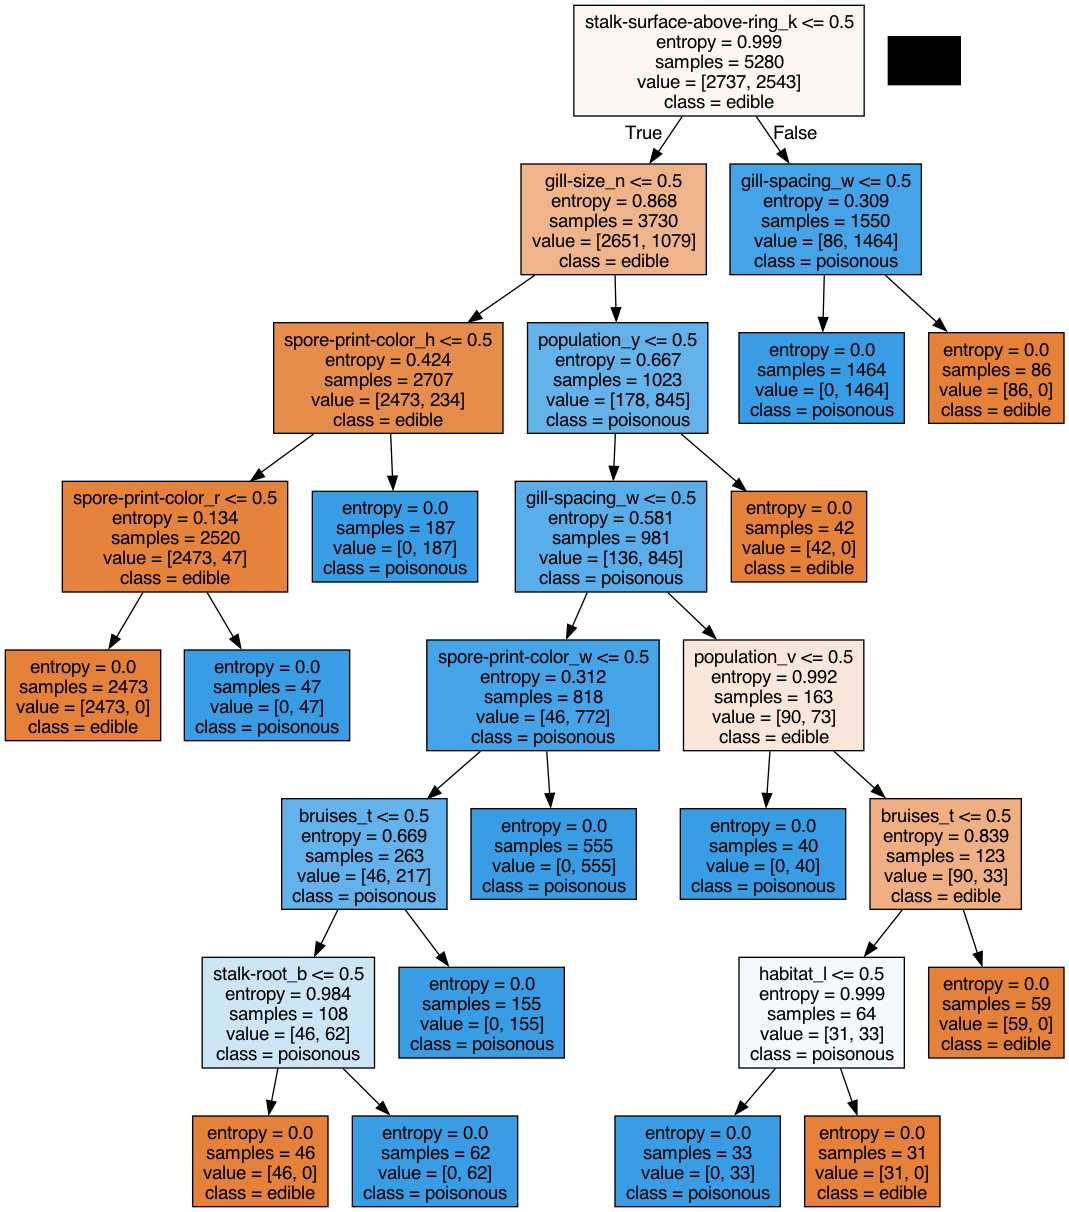

In [206]:

# Iterate over the hyperparameter combinations
for impurity in impurity_measures:
    for max_depth in max_depths:
        for purity_threshold in purity_thresholds:
            # Create an instance of the Decision Tree classifier
            dt_classifier = DecisionTreeClassifier(criterion=impurity, max_depth=max_depth, min_impurity_decrease=purity_threshold, min_samples_leaf=1)

            # Fit the classifier on the training data
            dt_classifier.fit(X_train, y_train)

            # Predict labels for training and test data
            train_predictions = dt_classifier.predict(X_train)
            test_predictions = dt_classifier.predict(X_test)

            # Calculate training and test accuracies
            train_accuracy = accuracy_score(y_train, train_predictions)
            test_accuracy = accuracy_score(y_test, test_predictions)

            # Store the results in the DataFrame
            results_df = results_df.append({'Impurity Measure': impurity, 'Max Depth': max_depth, 'Purity Threshold': purity_threshold,
                                            'Training Accuracy': train_accuracy, 'Test Accuracy': test_accuracy}, ignore_index=True)

# Create a 2-D table (Depth vs. Purity)
pivot_table = results_df.pivot_table(values=['Training Accuracy', 'Test Accuracy'], index='Max Depth', columns='Purity Threshold')

print(pivot_table)

# Find the best parameter combination based on test accuracy
best_combination = results_df.loc[results_df['Test Accuracy'].idxmax()]

# Draw the decision tree based on the best parameter combination
dt_classifier = DecisionTreeClassifier(criterion=best_combination['Impurity Measure'], max_depth=best_combination['Max Depth'],
                                       min_impurity_decrease=best_combination['Purity Threshold'], min_samples_leaf=1)
dt_classifier.fit(X_train, y_train)

# Get the textual representation of the Decision Tree rules
tree_rules = export_text(dt_classifier, feature_names=list(X_train.columns))
print(tree_rules)

# Visualize the decision tree using pydot
dot_data = export_graphviz(dt_classifier, out_file=None, feature_names=list(X_train.columns),
                           class_names=['edible', 'poisonous'], filled=True)
graph = pydot.graph_from_dot_data(dot_data)

# Render the Decision Tree in Jupyter Notebook
Image(graph[0].create_png())


In [97]:
from sklearn.tree import DecisionTreeClassifier, export_text
from sklearn.model_selection import train_test_split, GridSearchCV
import pandas as pd

# Load the dataset (Replace 'mushrooms.csv' with the correct path if needed)
data = pd.read_csv('mushrooms.csv')

# Preprocess the data - Label encode the categorical features
label_encoder = LabelEncoder()
for column in data.columns:
    data[column] = label_encoder.fit_transform(data[column])

X = data.drop('class', axis=1)
y = data['class']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.35, random_state=42)

# Define hyper-parameter grid for grid search
param_grid = {
    'criterion': ['entropy'],
    'max_depth': [None, 5, 10, 15, 20],  # Setting None allows the tree to grow unrestricted
    'min_impurity_decrease': [0.0, 0.1, 0.2, 0.3, 0.4],  # Expanding the range for impurity decrease
    'min_samples_leaf': [1, 2, 5, 10]  # Expanding the range for min samples per leaf
}

# Perform grid search to find the best hyperparameters
grid_search = GridSearchCV(DecisionTreeClassifier(), param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Get the best Decision Tree model from grid search
best_clf = grid_search.best_estimator_

# Extract the rules learned by the Decision Tree
rules = export_text(best_clf, feature_names=X.columns.tolist())

# Print the rules
print("Rules Learned by the Decision Tree:")
print(rules)

# Print the best hyperparameters
print("\nBest Hyperparameters:")
print(grid_search.best_params_)


Rules Learned by the Decision Tree:
|--- gill-color <= 0.50
|   |--- class: 1
|--- gill-color >  0.50
|   |--- spore-print-color <= 1.50
|   |   |--- stalk-root <= 0.50
|   |   |   |--- class: 0
|   |   |--- stalk-root >  0.50
|   |   |   |--- class: 1
|   |--- spore-print-color >  1.50
|   |   |--- gill-size <= 0.50
|   |   |   |--- spore-print-color <= 4.50
|   |   |   |   |--- class: 0
|   |   |   |--- spore-print-color >  4.50
|   |   |   |   |--- stalk-root <= 0.50
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- stalk-root >  0.50
|   |   |   |   |   |--- habitat <= 3.50
|   |   |   |   |   |   |--- population <= 4.50
|   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |--- population >  4.50
|   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |--- habitat >  3.50
|   |   |   |   |   |   |--- class: 0
|   |   |--- gill-size >  0.50
|   |   |   |--- odor <= 5.50
|   |   |   |   |--- odor <= 2.00
|   |   |   |   |   |--- stalk-shape <= 0.50
|   |   |  

Question 3 
Parameter Sweep on k-NN
- Dataset: https://www.kaggle.com/c/digit-recognizer
- Divide it randomly into 65% training and 35% test data
- Build a k-NN classifier with the following hyper-parameters:
- o K = 1, 3, 5, 7, 9, 11, 13, 15
- Plot the training and test accuracies for each K
- Find the optimal K for this task

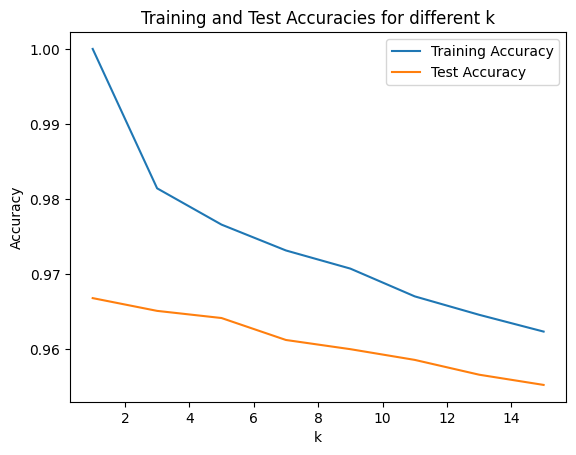

Optimal k: 1


In [41]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv('train.csv')
# Separate features and labels
features = data.iloc[:, 1:].values
labels = data.iloc[:, 0].values

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.35, random_state=42)

# Define different values of k
k_values = [1, 3, 5, 7, 9, 11, 13, 15]

# Lists to store training and test accuracies for each k
train_accuracies = []
test_accuracies = []

# Iterate over different values of k
for k in k_values:
    # Create an instance of the k-NN classifier
    knn = KNeighborsClassifier(n_neighbors=k)
    
    # Fit the classifier on the training data
    knn.fit(X_train, y_train)
    
    # Calculate training accuracy
    train_accuracy = knn.score(X_train, y_train)
    train_accuracies.append(train_accuracy)
    
    # Calculate test accuracy
    test_accuracy = knn.score(X_test, y_test)
    test_accuracies.append(test_accuracy)

# Plot the training and test accuracies
plt.plot(k_values, train_accuracies, label='Training Accuracy')
plt.plot(k_values, test_accuracies, label='Test Accuracy')
plt.xlabel('k')
plt.ylabel('Accuracy')
plt.title('Training and Test Accuracies for different k')
plt.legend()
plt.show()

# Find the optimal k
optimal_k = k_values[test_accuracies.index(max(test_accuracies))]
print('Optimal k:', optimal_k)


Question 4
Classification with PCA vs. FISHER
- Dataset: https://www.kaggle.com/c/digit-recognizer
- Apply 9-dimensional PCA – Call it the Digits-PCA dataset
- Apply 9-dimensional FISHER – Call it the Digits-FISHER dataset
- Divide the data into 65% training and 35% test (after projection).
- Build a Decision Tree classifier with depth 5, purity threshold 0.8 for each dataset
- o What is the train and test accuracy of Digits-PCA-Tree classifier?
- o What is the train and test accuracy of Digits-FISHER-Tree classifier? - Build a k-NN classifier with k = 5 on both datasets
- o What is the train and test accuracy of Digits-PCA-kNN classifier?
- o What is the train and test accuracy of Digits-FISHER-kNN classifier?
- Build a Logistic Regression with between any pair of classes (say 0 vs 3, 4 vs 9)
- o What is the train and test accuracy of Digits-PCA-Logistic-Regression classifier?
- o What is the train and test accuracy of Digits-FISHER-Logistic-Regression classifier? - Comment on whether PCA vs. FISHER is better for projection

In [ ]:
pip install graphviz


In [42]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Load the dataset
data = pd.read_csv('train.csv')

# Separate features and labels
features = data.iloc[:, 1:].values
labels = data.iloc[:, 0].values

# Apply PCA
pca = PCA(n_components=9)
pca_features = pca.fit_transform(features)

# Apply Fisher Linear Discriminant (FLD)
fld = LinearDiscriminantAnalysis(n_components=9)
fld_features = fld.fit_transform(features, labels)

# Split the data into training and test sets
pca_X_train, pca_X_test, pca_y_train, pca_y_test = train_test_split(pca_features, labels, test_size=0.35, random_state=42)
fld_X_train, fld_X_test, fld_y_train, fld_y_test = train_test_split(fld_features, labels, test_size=0.35, random_state=42)

# Build Decision Tree classifiers
pca_dt_classifier = DecisionTreeClassifier(max_depth=5, min_impurity_decrease=0.8)
pca_dt_classifier.fit(pca_X_train, pca_y_train)
pca_train_accuracy = accuracy_score(pca_y_train, pca_dt_classifier.predict(pca_X_train))
pca_test_accuracy = accuracy_score(pca_y_test, pca_dt_classifier.predict(pca_X_test))

fld_dt_classifier = DecisionTreeClassifier(max_depth=5, min_impurity_decrease=0.8)
fld_dt_classifier.fit(fld_X_train, fld_y_train)
fld_train_accuracy = accuracy_score(fld_y_train, fld_dt_classifier.predict(fld_X_train))
fld_test_accuracy = accuracy_score(fld_y_test, fld_dt_classifier.predict(fld_X_test))

print("Digits-PCA-Tree Classifier:")
print("Train Accuracy:", pca_train_accuracy)
print("Test Accuracy:", pca_test_accuracy)

print("\nDigits-FISHER-Tree Classifier:")
print("Train Accuracy:", fld_train_accuracy)
print("Test Accuracy:", fld_test_accuracy)

# Build k-NN classifiers
k = 5

pca_knn_classifier = KNeighborsClassifier(n_neighbors=k)
pca_knn_classifier.fit(pca_X_train, pca_y_train)
pca_train_accuracy = accuracy_score(pca_y_train, pca_knn_classifier.predict(pca_X_train))
pca_test_accuracy = accuracy_score(pca_y_test, pca_knn_classifier.predict(pca_X_test))

fld_knn_classifier = KNeighborsClassifier(n_neighbors=k)
fld_knn_classifier.fit(fld_X_train, fld_y_train)
fld_train_accuracy = accuracy_score(fld_y_train, fld_knn_classifier.predict(fld_X_train))
fld_test_accuracy = accuracy_score(fld_y_test, fld_knn_classifier.predict(fld_X_test))

print("\nDigits-PCA-kNN Classifier:")
print("Train Accuracy:", pca_train_accuracy)
print("Test Accuracy:", pca_test_accuracy)

print("\nDigits-FISHER-kNN Classifier:")
print("Train Accuracy:", fld_train_accuracy)
print("Test Accuracy:", fld_test_accuracy)

# Build Logistic Regression classifiers
class_pair = (0, 3)

pca_lr_classifier = LogisticRegression()
pca_lr_classifier.fit(pca_X_train, (pca_y_train == class_pair[0]))
pca_train_accuracy = accuracy_score((pca_y_train == class_pair[0]), pca_lr_classifier.predict(pca_X_train))
pca_test_accuracy = accuracy_score((pca_y_test == class_pair[0]), pca_lr_classifier.predict(pca_X_test))

fld_lr_classifier = LogisticRegression()
fld_lr_classifier.fit(fld_X_train, (fld_y_train == class_pair[0]))
fld_train_accuracy = accuracy_score((fld_y_train == class_pair[0]), fld_lr_classifier.predict(fld_X_train))
fld_test_accuracy = accuracy_score((fld_y_test == class_pair[0]), fld_lr_classifier.predict(fld_X_test))

print("\nDigits-PCA-Logistic-Regression Classifier:")
print("Train Accuracy:", pca_train_accuracy)
print("Test Accuracy:", pca_test_accuracy)

print("\nDigits-FISHER-Logistic-Regression Classifier:")
print("Train Accuracy:", fld_train_accuracy)
print("Test Accuracy:", fld_test_accuracy)


Digits-PCA-Tree Classifier:
Train Accuracy: 0.11263736263736264
Test Accuracy: 0.10945578231292517

Digits-FISHER-Tree Classifier:
Train Accuracy: 0.11263736263736264
Test Accuracy: 0.10945578231292517

Digits-PCA-kNN Classifier:
Train Accuracy: 0.9364102564102564
Test Accuracy: 0.9059183673469388

Digits-FISHER-kNN Classifier:
Train Accuracy: 0.9365567765567766
Test Accuracy: 0.9181632653061225

Digits-PCA-Logistic-Regression Classifier:
Train Accuracy: 0.971025641025641
Test Accuracy: 0.9725850340136054

Digits-FISHER-Logistic-Regression Classifier:
Train Accuracy: 0.9872161172161172
Test Accuracy: 0.9878911564625851


PCA vs. Fisher for Tree Classifier:

The accuracy scores for both PCA and Fisher projections with the Tree Classifier are very low and nearly identical for both training and test data. This suggests that the Tree Classifier is not well-suited for either PCA or Fisher-transformed features. Decision Trees might not be able to capture the complex patterns and relationships present in the high-dimensional data space.

PCA vs. Fisher for kNN Classifier:

Both PCA and Fisher projections perform significantly better with the kNN Classifier compared to the Tree Classifier. The test accuracy of the Fisher-transformed features is slightly higher than PCA-transformed features.
kNN is a non-linear model and can better utilize the informative features generated by Fisher Discriminant Analysis (FDA), which are specifically designed to maximize class separation.

PCA vs. Fisher for Logistic Regression Classifier:

Both PCA and Fisher transformations work very well with the Logistic Regression Classifier. However, the accuracy of Fisher-transformed features is higher, indicating that Fisher features capture more discriminative information for logistic regression.

In summary, the effectiveness of PCA vs. Fisher transformation depends on the classifier being used. For linear models like Logistic Regression, Fisher transformation often outperforms PCA as it maximizes the class separation. However, for non-linear models like kNN, Fisher transformation can still be useful, but its superiority over PCA might not be as pronounced. For decision tree-based classifiers, neither PCA nor Fisher transformation seems to be effective, likely due to the limitations of decision trees in handling high-dimensional data.
